# Taxi and Limousine Commission (TLC) Project        
 
---  

## <span id='summary'> Executive Summary</span>  
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas lobortis augue vel tristique semper. Etiam eu lectus a leo molestie venenatis ac nec tortor. Suspendisse ornare, ipsum vitae mattis consequat, augue leo volutpat dolor, et hendrerit arcu massa quis nisl. Sed nibh risus, blandit non vehicula id, euismod eu lacus. Curabitur scelerisque metus velit, et tincidunt mauris ultricies vitae. 
 
---  
## <span id='all'>All about Projects</span>  
    
#### Project Context  
The majority of New Yorkers depend on public transportation or taxi services. Only 22% of Manhattan residents own a car, compared to an average of 91% of households across the United States owning at least one car. Taxi service in New York is the fourth largest transportation network in the United States. The system is regulated by the New York City Taxi and Limousine Commission (TLC), which oversees yellow taxis, charter taxis, commuter cars, transit vehicles, and certain limousines. Despite its large network, the current system does not serve the boroughs equally. Because of this, residents prefer illegal taxi services that have inconsistent access and fares.


#### Project Requirement   

1. What causes the yellow taxi service to only be concentrated in certain boroughs, causing an imbalance in demand and supply in other boroughs?  
2. TLC wants their yellow taxi services to be spread evenly throughout the city of New York so they can respond to existing demand. What should TLC do in the short term (6 months) to overcome this challenge?  
3. Finding meaningful information inside the given dataset!


#### Project Planning  
1. Exploratory Data Analysis (EDA)
    - Data Structure Check (shape, datatype, head, tail)
    - Data Quality Check (missing value, outlier, distribution)
    - Data Cleaning (missing value, outlier, inappropiate values, high cardinality)
    - Content Investigation (hypothesis testing, predictive power check through descriptive/visualization and analytics)
2. Data Preporcessing & Feature Engineering
3. Feature Selection
4. Models Training
5. Models Evaluation   

---    

## Content  

  
[**Executive Summary**](#summary)  
[**All About Project**](#all)  
[**Content**](#content)   
  
[**1. Exploratory Data Analysis (EDA)**](#1)  
    - [Data Structure Check](#1.1)  
    - [Data Quality Check](#1.2)  
    - [Univariate Analysis](#1.3)    
    - [Bivariate Analysis](#1.4)  
    - [Data Cleaning](#1.5)  
    - [Content Investigation/Ad-hoc Analysis](#1.6)  
[**2. Data Preporcessing & Feature Engineering**](#2)  
[**3. Feature Selection & Modeling**](#3)  

---


## Dataset Dictionary

| Column | Description |
| :---        |    :----   |
| VendorID | A code indicating the TPEP provider that provided the record. (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)|
| tpep_pickup_datetime | The date and time when the meter was engaged. |
| tpep_dropoff_datetime | The date and time when the meter was disengaged. |
| Passenger_count | The number of passengers in the vehicle. This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
| RateCodeID | The final rate code in effect at the end of the trip. (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride) |
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. (Y= store and forward trip N= not a store and forward trip) |
| Payment_type | A numeric code signifying how the passenger paid for the trip. (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip) |
| Fare_amount | The time-and-distance fare calculated by the meter.|
| Extra | Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges. |
| Total_amount | The total amount charged to passengers. Does not include cash tips. |
| Improvement_surcharge | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| tip_amount | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip. |
| Congestion_Surcharge | Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | \$1.25 for pick up only at LaGuardia and John F. Kennedy Airports |
| MTA_tax | \$0.50 MTA tax that is automatically triggered based on the metered rate in use.|

---  


**Feature Enginnering - Notes**  

- dummy variable: 'VendorID', 'borough', 'Payment_type', 'RateCodeID', 

- derived variables:
    - `is_extra`
    - `is_tip`
    - `is_tolls`
    - `is_congestion_surcharge`
    - `is_airport_fee`
    - `tpep_pickup_datetime` : `tpep_pickup_date` `tpep_pickup_time` `tpep_pickup_hour` `tpep_pickup_day` `tpep_pickup_weekday` `tpep_pickup_is_weekend` `tpep_pickup_is_business_day`
    - `tpep_dropoff_datetime`: `tpep_dropoff_date` `tpep_dropoff_time` `tpep_dropoff_hour` `tpep_dropoff_day` `tpep_dropoff_weekday` `tpep_dropoff_is_weekend` `tpep_dropoff_is_business_day`
    
    
- new variables:  
    - `duration_hour`: `tpep_dropoff_datetime` - `tpep_pickup_datetime`  
    - `speed`: `Trip_distance` / `time_elapsed`
    - `fare_per_distance`: `fare_amoung` / `Trip_distance`
    - `additional_cost`
    - `prct_additional_cost`
    - `average_pessanger_per_borough`
    - `median_pessanger_per_borough`
    - `95percentile_pessanger_per_borough`
    - `99percentile_pessanger_per_borough`
    - `average_fare_amount_per_borough`
    - `median_fare_amount_per_borough`
    - `95percentile_fare_amount_per_borough`
    - `99percentile_fare_amount_per_borough`

## <span id=1> 1. Exploratory Data Analysis (EDA)</span>  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from datetime import datetime as dt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

pd.pandas.set_option('display.max_columns',None)
pd.options.display.float_format = "{:.4f}".format
sns.set()

In [4]:
df = pd.read_parquet('..\dataset\yellow_tripdata_2021-09.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,1.0000,N,87,229,1,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0000,1.1300,1.0000,N,162,229,1,6.0000,0.5000,0.5000,1.9600,0.0000,0.3000,11.7600,2.5000,0.0000
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0000,1.3700,1.0000,N,141,262,1,6.0000,0.5000,0.5000,1.9600,0.0000,0.3000,11.7600,2.5000,0.0000
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0000,6.5000,1.0000,N,90,260,2,21.0000,3.0000,0.5000,0.0000,6.5500,0.3000,31.3500,2.5000,0.0000
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0000,2.3200,1.0000,N,75,238,2,10.5000,0.5000,0.5000,0.0000,0.0000,0.3000,11.8000,0.0000,0.0000


In [5]:
# lookup table reference: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

borough = pd.read_csv('..\\dataset\\taxi+_zone_lookup.csv')
borough = borough[['LocationID', 'Borough']]
borough.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [6]:
df = pd.merge(df, borough, how='inner', left_on='PULocationID', right_on='LocationID')
df = pd.merge(df, borough, how='inner', left_on='DOLocationID', right_on='LocationID')

In [7]:
df.drop(['LocationID_y', 'LocationID_x'], axis=1, inplace=True)

In [8]:
df = df.rename(columns={"Borough_x": "PU_Borough", "Borough_y": "DO_Borough"})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,DO_Borough
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,1.0000,N,87,229,1,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,Manhattan,Manhattan
1,2,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0000,5.6200,1.0000,N,87,229,1,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,Manhattan,Manhattan
2,2,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0000,5.9800,1.0000,N,87,229,1,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,Manhattan,Manhattan
3,2,2021-09-01 13:16:32,2021-09-01 13:30:06,1.0000,6.1800,1.0000,N,87,229,1,19.0000,0.0000,0.5000,5.5800,0.0000,0.3000,27.8800,2.5000,0.0000,Manhattan,Manhattan
4,2,2021-09-01 14:50:59,2021-09-01 15:02:57,2.0000,4.9800,1.0000,N,87,229,2,16.0000,0.0000,0.5000,0.0000,0.0000,0.3000,19.3000,2.5000,0.0000,Manhattan,Manhattan


In [18]:
df.info()

# Note:
    ## shape (2963793, 21)
    ## datatypes are okay
    
# To do:
    ## to save up some memories, it is better to convert some datatype into lower memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963793 entries, 0 to 2963792
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [16]:
100 * df['PU_Borough'].value_counts(normalize=True)

# Note:
    ## almost 90% of pick-up borough is Manhattan, the 10% is others
    ## For simplifying, I will convert it into binary
    
# To do:
    ## Convert 'PU_Borough' into binary
    ## Rename 'PU_Borough' into 'PU_Borough_Manhattan'

Manhattan       89.9966
Queens           7.4751
Unknown          1.2043
Brooklyn         1.0305
Bronx            0.2713
Staten Island    0.0119
EWR              0.0103
Name: PU_Borough, dtype: float64

In [41]:
100 * df['DO_Borough'].value_counts(normalize=True)

# Note:
    ## almost 90% of drop-off borough is Manhattan, the 10% is others

Manhattan       89.5719
Queens           4.7656
Brooklyn         3.7649
Unknown          0.9418
Bronx            0.7466
EWR              0.1791
Staten Island    0.0302
Name: DO_Borough, dtype: float64

In [40]:
len(df[( df['PU_Borough']=='Manhattan') & (df['DO_Borough']=='Manhattan')]) / len(df)

# To-do:
    # make a target column to describe the taxi operation that only focus on Manhattan area
    # I would call it with 'target_manhattan'
    # if the pick-up & drop-off in Manhattan then give 1, else 0

0.8506709999755401

In [19]:
100*df.isna().sum()/len(df)

# Note:
    ## 4.82% of missing value
    
# To do:
    ## Explore & find the context

VendorID                0.0000
tpep_pickup_datetime    0.0000
tpep_dropoff_datetime   0.0000
passenger_count         4.8200
trip_distance           0.0000
RatecodeID              4.8200
store_and_fwd_flag      4.8200
PULocationID            0.0000
DOLocationID            0.0000
payment_type            0.0000
fare_amount             0.0000
extra                   0.0000
mta_tax                 0.0000
tip_amount              0.0000
tolls_amount            0.0000
improvement_surcharge   0.0000
total_amount            0.0000
congestion_surcharge    4.8200
airport_fee             4.8200
PU_Borough              0.0000
DO_Borough              0.0000
dtype: float64

In [20]:
df.describe(include='number').T

# Note:
    ## The dataset might have some outliers
    ## inappropiate values found!
        ### negative values in 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 
        ### 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'

# To do:
    ## Check the data dictionary
    ## Find more context in it

,count,mean,std,min,25%,50%,75%,max
VendorID,2963793.0000,1.7193,0.5328,1.0000,1.0000,2.0000,2.0000,6.0000
passenger_count,2820939.0000,1.4238,1.0257,0.0000,1.0000,1.0000,1.0000,9.0000
trip_distance,2963793.0000,6.5836,656.7038,0.0000,1.1000,1.9000,3.4900,317182.4500
RatecodeID,2820939.0000,1.1172,2.4775,1.0000,1.0000,1.0000,1.0000,99.0000
PULocationID,2963793.0000,164.2187,66.3514,1.0000,125.0000,162.0000,234.0000,265.0000
DOLocationID,2963793.0000,161.9331,70.7368,1.0000,112.0000,162.0000,234.0000,265.0000
payment_type,2963793.0000,1.1804,0.5248,0.0000,1.0000,1.0000,1.0000,4.0000
fare_amount,2963793.0000,14.4505,475.4842,-474.0000,7.0000,10.0000,16.0000,818283.4400
extra,2963793.0000,1.0429,1.2511,-5.5000,0.0000,0.5000,2.5000,9.5500
mta_tax,2963793.0000,0.4924,0.0762,-0.5000,0.5000,0.5000,0.5000,3.3000


In [23]:
# quantile stats description for numerical columns

nmric_cols = df.select_dtypes(include='number').columns
quantile_stat = {}

for col in nmric_cols:
    range_quartile = df[col].max() - df[col].min()
    interquartile = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5*interquartile
    higher_bound = df[col].quantile(0.75) + 1.5*interquartile
    
    quantile_stat[col] = [range_quartile, interquartile, lower_bound, higher_bound]
    
quantile_stat = pd.DataFrame(quantile_stat).T
quantile_stat.columns = ['range', 'interquartile', 'lower_bound', 'higher_bound']
quantile_stat = pd.concat([df.describe(include='number').T, quantile_stat], axis=1)

quantile_stat['low_outliers'] = np.vectorize(lambda x, y: 1 if x>y else 0)(quantile_stat['lower_bound'], quantile_stat['min'])
quantile_stat['high_outliers'] = np.vectorize(lambda x, y: 1 if x<y else 0)(quantile_stat['higher_bound'], quantile_stat['max'])

quantile_stat


# Note
    ## The outliers found in the 'high_outliers' & 'low_outliers' columns
    
# To do
    ## Check & find some context
    ## Remove outliers & analyze the general theme ???

,count,mean,std,min,25%,50%,75%,max,range,interquartile,lower_bound,higher_bound,low_outliers,high_outliers
VendorID,2963793.0000,1.7193,0.5328,1.0000,1.0000,2.0000,2.0000,6.0000,5.0000,1.0000,-0.5000,3.5000,0,1
passenger_count,2820939.0000,1.4238,1.0257,0.0000,1.0000,1.0000,1.0000,9.0000,9.0000,0.0000,1.0000,1.0000,1,1
trip_distance,2963793.0000,6.5836,656.7038,0.0000,1.1000,1.9000,3.4900,317182.4500,317182.4500,2.3900,-2.4850,7.0750,0,1
RatecodeID,2820939.0000,1.1172,2.4775,1.0000,1.0000,1.0000,1.0000,99.0000,98.0000,0.0000,1.0000,1.0000,0,1
PULocationID,2963793.0000,164.2187,66.3514,1.0000,125.0000,162.0000,234.0000,265.0000,264.0000,109.0000,-38.5000,397.5000,0,0
DOLocationID,2963793.0000,161.9331,70.7368,1.0000,112.0000,162.0000,234.0000,265.0000,264.0000,122.0000,-71.0000,417.0000,0,0
payment_type,2963793.0000,1.1804,0.5248,0.0000,1.0000,1.0000,1.0000,4.0000,4.0000,0.0000,1.0000,1.0000,1,1
fare_amount,2963793.0000,14.4505,475.4842,-474.0000,7.0000,10.0000,16.0000,818283.4400,818757.4400,9.0000,-6.5000,29.5000,1,1
extra,2963793.0000,1.0429,1.2511,-5.5000,0.0000,0.5000,2.5000,9.5500,15.0500,2.5000,-3.7500,6.2500,1,1
mta_tax,2963793.0000,0.4924,0.0762,-0.5000,0.5000,0.5000,0.5000,3.3000,3.8000,0.0000,0.5000,0.5000,1,1


In [24]:
# check for kurtosis & skewness

nmric_cols = df.select_dtypes(include='number').columns
skew_kurt = {}

for col in nmric_cols:
    skew_kurt[col] = [df[col].kurtosis(), df[col].skew()]

skew_kurt = pd.DataFrame(skew_kurt).T
skew_kurt.columns = ['kurtosis', 'skewness']
skew_kurt


# Notes:
    ## by looking at the kurtosis & skewness, almost all columns have non-Gaussian distribution
    
# To do:
    ## consider to use a model that doesn't have a constraint of a normal distribution
    ## e.g. ensemble model

,kurtosis,skewness
VendorID,15.1135,1.4961
passenger_count,7.2518,2.6110
trip_distance,95204.5179,276.2922
RatecodeID,1525.0358,38.6984
PULocationID,-0.9503,-0.2484
DOLocationID,-0.9889,-0.3237
payment_type,3.2225,0.9769
fare_amount,2959324.2501,1719.6199
extra,0.2429,1.0170
mta_tax,128.3529,-10.8464


In [21]:
df.describe(exclude='number')

# Note:
    ## The last 'tpep_pickup_datetime' is 2098-09-11 02:23:31 ???
    ## The last 'tpep_dropoff_datetime' is 2098-09-11 02:52:04 ???

C:\Users\ichfa\AppData\Local\Temp\ipykernel_15296\1805651458.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')
C:\Users\ichfa\AppData\Local\Temp\ipykernel_15296\1805651458.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag,PU_Borough,DO_Borough
count,2963793,2963793,2820939,2963793,2963793
unique,1565270,1564534,2,7,7
top,2021-09-15 17:22:00,2021-09-04 00:00:00,N,Manhattan,Manhattan
freq,28,32,2785439,2667312,2622985
first,2003-01-03 12:54:36,2003-01-04 09:35:38,NaN,NaN,NaN
last,2098-09-11 02:23:31,2098-09-11 02:52:04,NaN,NaN,NaN


In [26]:
df.duplicated().sum() 

# Note: no duplication

0

In [30]:
df['payment_type'].value_counts(dropna=False, normalize=True)

1   0.7350
2   0.2087
0   0.0482
3   0.0044
4   0.0037
Name: payment_type, dtype: float64

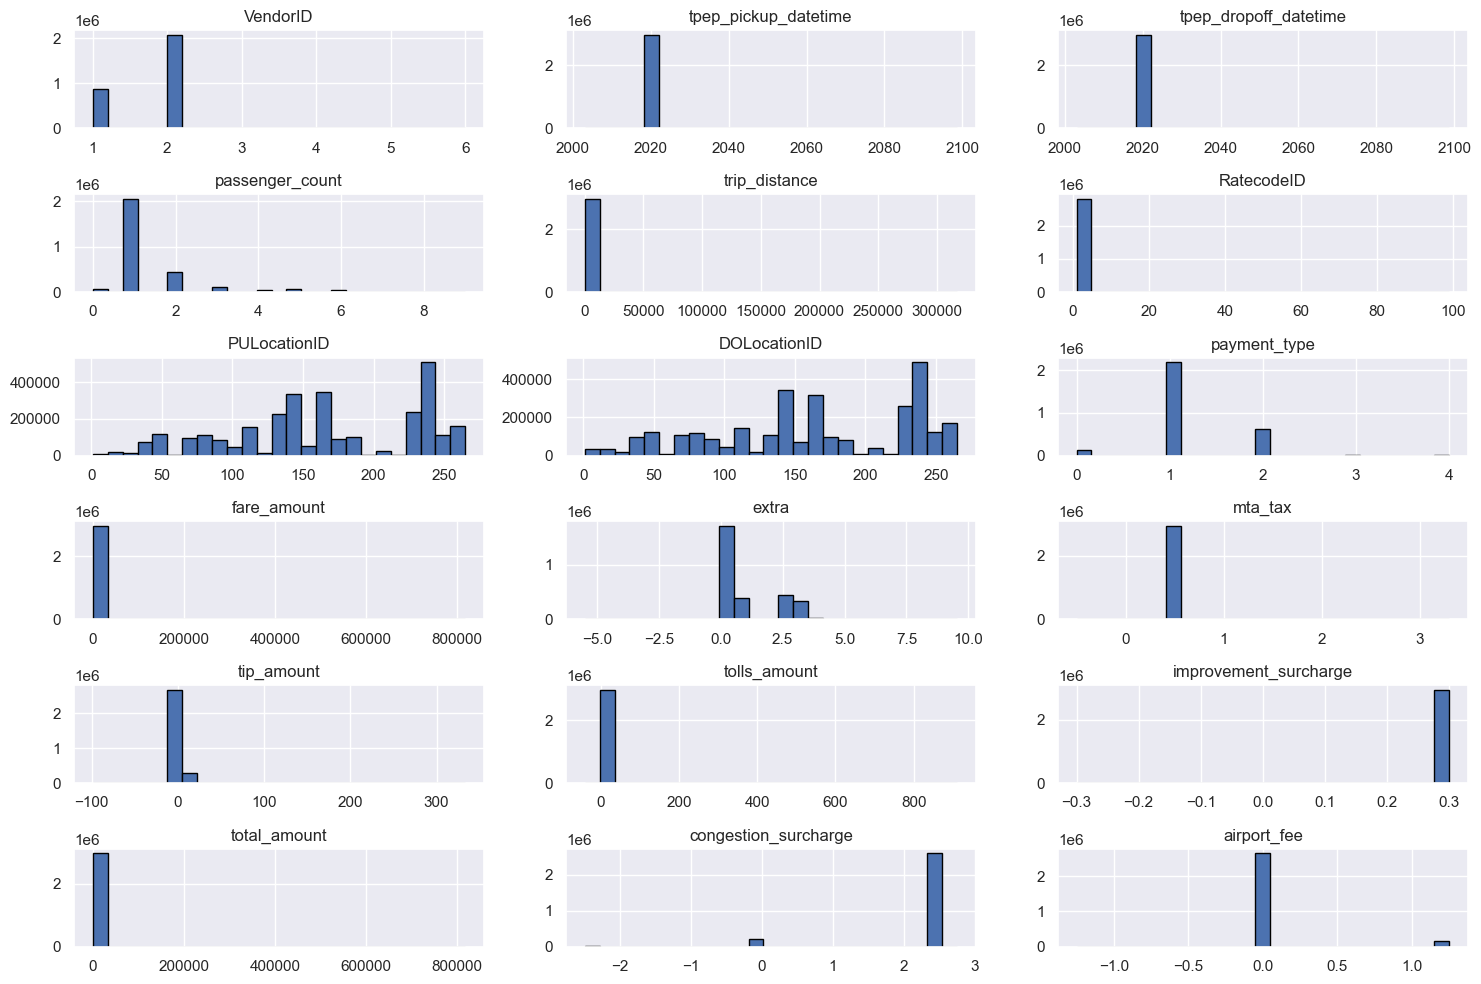

In [27]:
df.hist(bins=25, figsize=(15,10), layout=(-1,3), edgecolor="black")
plt.tight_layout();

# Note:
    ## 'VendorID' inappropriate value found -> it should be either 1 or 2
    ## 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' outliers
    ## 'passenger_count' inappropriate value found -> it should be more than 0
    ## drop inappropiate value (negative values) in some columns
    ## some columns might be more meaningful if we convert it into categorical variable
    
    
# To do:
    ## drop inappropiate value in 'VendorID', 'passenger_count', 
    ## drop outliers in 'tpep_pickup_datetime' & 'tpep_dropoff_datetime'\
    ## drop negative values (inappropiate) in 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
        ## 'tolls_amount', 'total_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
    ## convert to categorical 'VendorID' 'RateCodeID' 'Payment_type' 'PULocationID' 'DOLocationID'

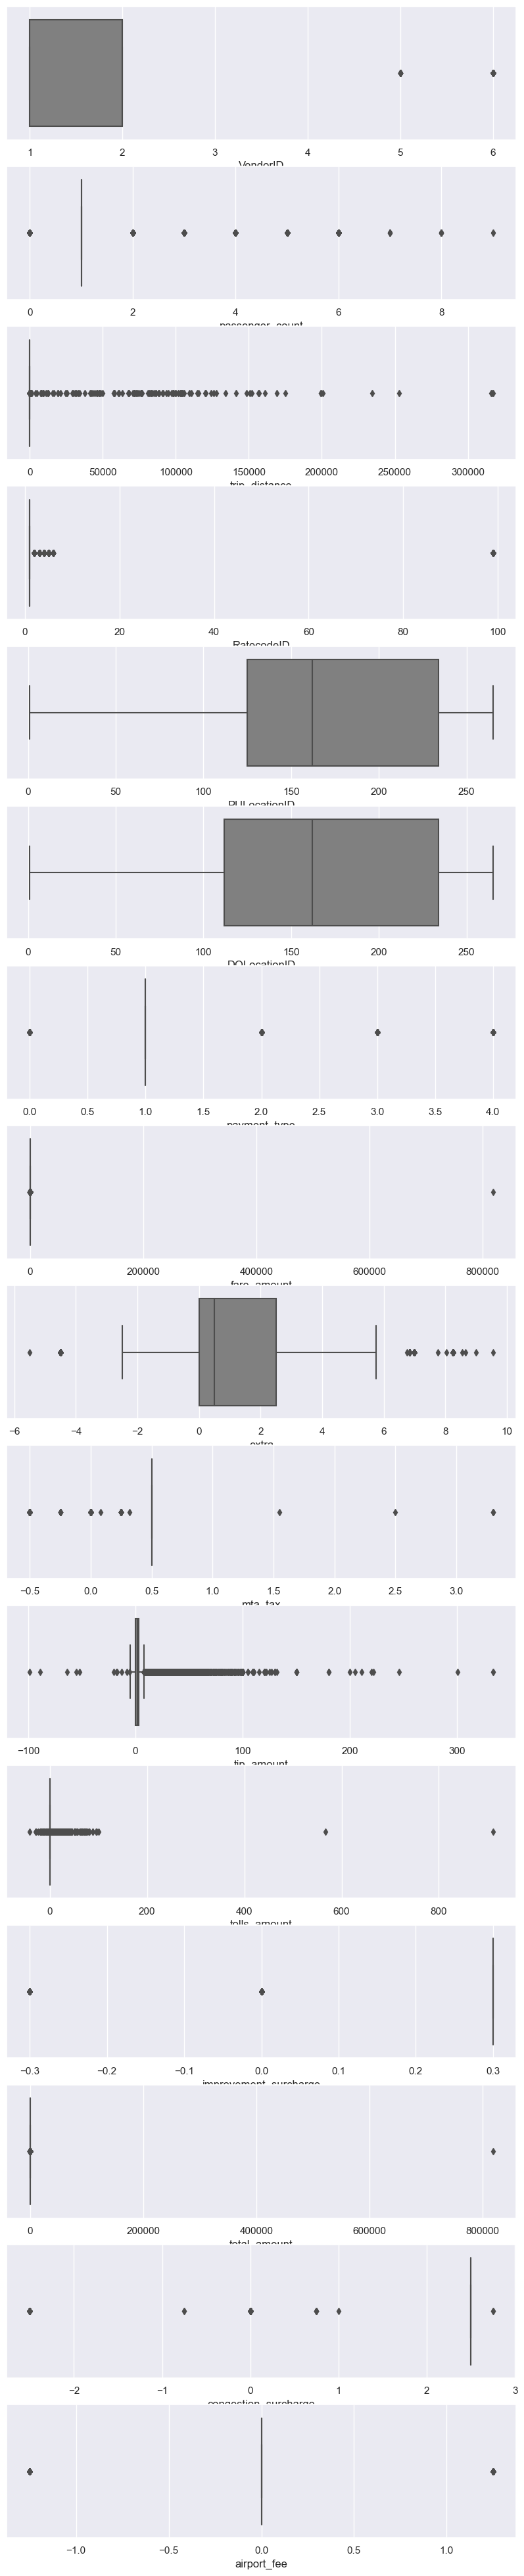

In [37]:
# outliers could be spotted through boxplot

nmric_cols = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(len(nmric_cols), 1, figsize=(10,50))
for i, col in enumerate(nmric_cols):
    sns.boxplot(ax=axes[i], x=df[col], orient='h', color='gray')
    
# Note:
    # spot some outliers

In [38]:
cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    if df[col].nunique() < 20 and df[col].nunique() != 1: # no more high cardinality
        print(f'Distribution of {col}:')
        print(df[col].value_counts(dropna=False, normalize=True)*100)
        print()
        
# Note:
    ## some missing value in store_and_fwd_flag
    
# To do:
    ## drop missing values

Distribution of store_and_fwd_flag:
N      93.9822
None    4.8200
Y       1.1978
Name: store_and_fwd_flag, dtype: float64

Distribution of PU_Borough:
Manhattan       89.9966
Queens           7.4751
Unknown          1.2043
Brooklyn         1.0305
Bronx            0.2713
Staten Island    0.0119
EWR              0.0103
Name: PU_Borough, dtype: float64

Distribution of DO_Borough:
Manhattan       88.5010
Queens           5.2693
Brooklyn         4.1356
Unknown          0.9389
Bronx            0.9060
EWR              0.2122
Staten Island    0.0370
Name: DO_Borough, dtype: float64



### Data Cleaning & Preps

In [9]:
# drop missing value
df.dropna(inplace=True)

In [10]:
# create the target column
df['target_manhattan'] = np.vectorize(lambda x, y: 1 if (x=='Manhattan') and (y == 'Manhattan') else 0)(df['PU_Borough'], df['DO_Borough'])

In [11]:
# drop inappropiate value in 'VendorID', 'passenger_count', 

df.drop(labels=df[~df['VendorID'].isin([1,2])].index,
       axis=0,
       inplace=True)

df.drop(labels=df[df['passenger_count'] == 0].index,
       axis=0,
       inplace=True)

In [12]:
df['tpep_pickup_year'] = df['tpep_pickup_datetime'].apply(lambda x: x.year)
df['tpep_dropoff_year'] = df['tpep_dropoff_datetime'].apply(lambda x: x.year)

In [55]:
df['tpep_pickup_year'].value_counts(normalize=True, dropna=False)

2021   1.0000
2009   0.0000
2008   0.0000
2098   0.0000
2003   0.0000
Name: tpep_pickup_year, dtype: float64

In [13]:
# drop pickup_year in other than 2021

df.drop(labels= df[df['tpep_pickup_year'] != 2021].index,
        axis=0,
        inplace=True)

In [58]:
df['tpep_dropoff_year'].value_counts(normalize=True, dropna=False)

2021   1.0000
Name: tpep_dropoff_year, dtype: float64

In [14]:
# drop negative values (inappropiate)

neg_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', \
 'total_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for col in neg_cols:
    df.drop(labels= df[df[col] < 0].index,
        axis=0,
        inplace=True)

In [15]:
# inappropiate in value in 'RatecodeID'

df.drop(labels= df[df['RatecodeID'] == 99].index,
    axis=0,
    inplace=True)

In [16]:
# inappropiate in numerical format
# mapped out into categorical data
# 'VendorID' 'RateCodeID' 'Payment_type' 'PULocationID' 'DOLocationID'

vendor_id = {1: 'Creative Mobile Technologies, LLC', 
             2: 'VeriFone Inc.'}

payment_type = {1: 'Credit card', 
                2: 'Cash', 
                3: 'No charge', 
                4: 'Dispute', 
                5: 'Unknown', 
                6: 'Voided trip'}

ratecodeid = {1: 'Standard rate', 
              2: 'JFK', 
              3: 'Newark', 
              4: 'Nassau or Westchester', 
              5: 'Negotiated fare', 
              6: 'Group ride'}



df['VendorID'] = df['VendorID'].map(vendor_id).values
df['RatecodeID'] = df['RatecodeID'].map(ratecodeid).values
df['payment_type'] = df['payment_type'].map(payment_type).values

In [17]:
df['PULocationID'] = df['PULocationID'].astype('string')
df['DOLocationID'] = df['DOLocationID'].astype('string')

In [20]:
# save file
df.to_parquet('..\\dataset\\df_cleaned.parquet')

## Finding Meaningful Info (AdHoc Analysis)

In [21]:
df = pd.read_parquet('..\\dataset\\df_cleaned.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,DO_Borough,target_manhattan,tpep_pickup_year,tpep_dropoff_year
0,VeriFone Inc.,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,Standard rate,N,87,229,Credit card,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021
1,VeriFone Inc.,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0000,5.6200,Standard rate,N,87,229,Credit card,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021
2,VeriFone Inc.,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0000,5.9800,Standard rate,N,87,229,Credit card,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021
3,VeriFone Inc.,2021-09-01 13:16:32,2021-09-01 13:30:06,1.0000,6.1800,Standard rate,N,87,229,Credit card,19.0000,0.0000,0.5000,5.5800,0.0000,0.3000,27.8800,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021
4,VeriFone Inc.,2021-09-01 14:50:59,2021-09-01 15:02:57,2.0000,4.9800,Standard rate,N,87,229,Cash,16.0000,0.0000,0.5000,0.0000,0.0000,0.3000,19.3000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021


### Univariate - Categorical Columns

In [47]:
# categorical feature distribution

cat_cols = ['VendorID','RatecodeID','store_and_fwd_flag','payment_type', 'PU_Borough', 'DO_Borough']

for col in cat_cols:
    print(100 * df[col].value_counts(dropna=False, normalize=True), end='\n\n\n')
    
# Finding:
    ## VendorID mostly is coming from VeriFone (71%)
    ## RateCodeID mostly use Standard rate (96%)
    ## Store & Forward Flag mostly is not store & forward (~99%)
        ### the operation area is moslty in connected area to the server
    ## two payment types mostly used are by CC (77%) & by cash (22%)
        ### make sense to avoid hassle
    ## The pickup & dropoff borough mostly is Manhattan (~91% & ~90% respectively)

VeriFone Inc.                       71.4020
Creative Mobile Technologies, LLC   28.5980
Name: VendorID, dtype: float64


Standard rate           98.5731
JFK                      1.3642
Nassau or Westchester    0.0353
Negotiated fare          0.0272
Newark                   0.0001
Group ride               0.0001
Name: RatecodeID, dtype: float64


N   98.8325
Y    1.1675
Name: store_and_fwd_flag, dtype: float64


Credit card   78.2323
Cash          21.4296
No charge      0.2259
Dispute        0.1122
Name: payment_type, dtype: float64


Manhattan       93.1688
Queens           5.5700
Unknown          0.6914
Brooklyn         0.4845
Bronx            0.0841
Staten Island    0.0011
EWR              0.0001
Name: PU_Borough, dtype: float64


Manhattan       91.2427
Queens           4.1036
Brooklyn         3.5259
Bronx            0.6196
Unknown          0.5059
Staten Island    0.0022
EWR              0.0001
Name: DO_Borough, dtype: float64




In [46]:
# target col distribution

100 * df['target_manhattan'].value_counts(dropna=False, normalize=True)

# Finding:
    ## the opeartion area (pickup & dropoff are in manhattan) is more than 87%

1   87.8971
0   12.1029
Name: target_manhattan, dtype: float64

In [56]:
# countplot for categorical feature

def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=df, color="gray")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

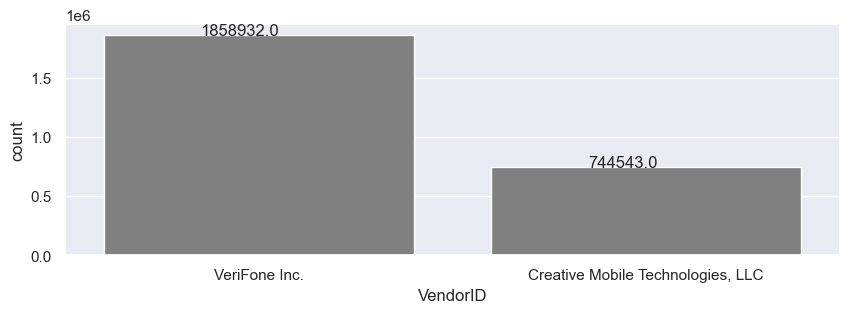

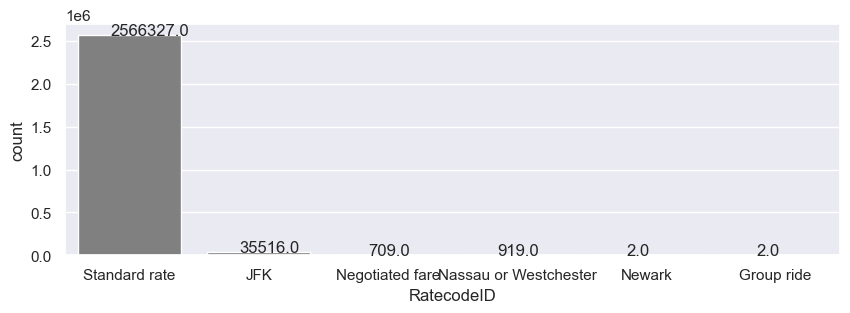

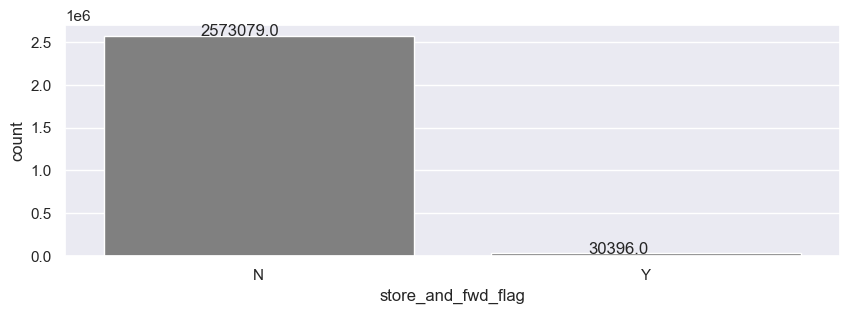

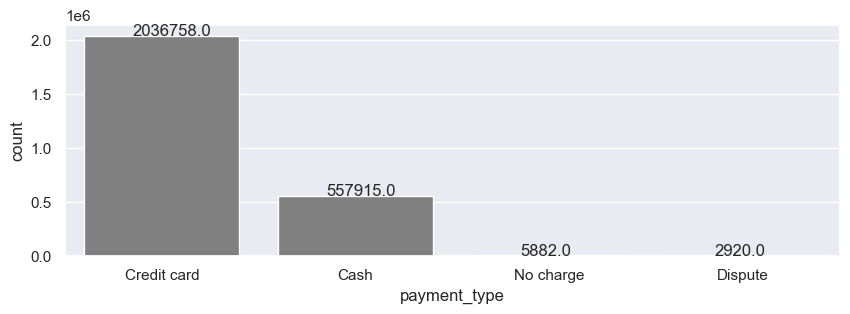

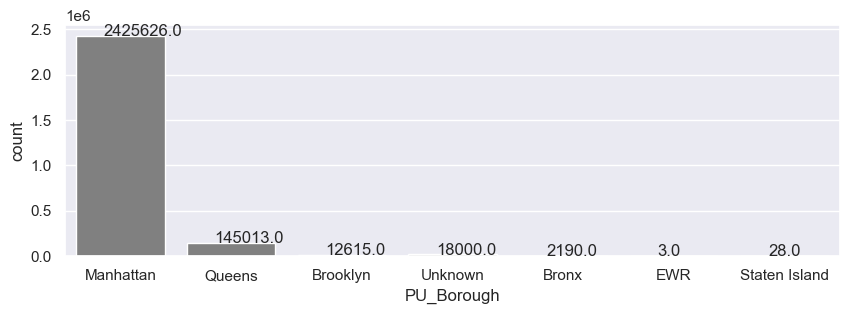

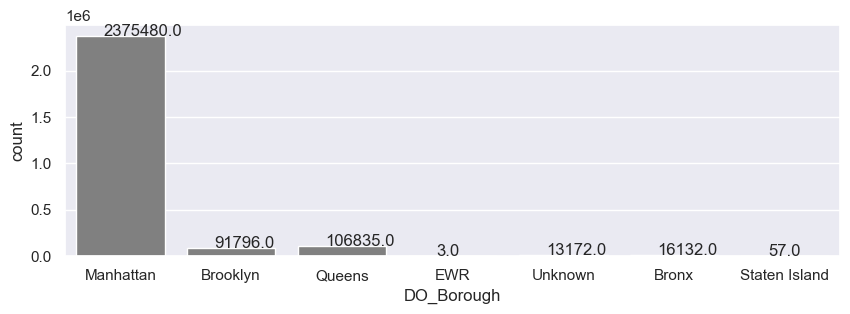

In [57]:
for col in cat_cols:
    feature_plot(col)

### Univariate - Numerical Columns

In [32]:
# duration of trip
df['duration_hour'] = pd.to_numeric((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / np.timedelta64(1, 'h'))

In [35]:
# statistical - descriptive
df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99], include='number').T

,count,mean,std,min,1%,5%,50%,95%,99%,max
passenger_count,2733670.0000,1.4624,1.0130,1.0000,1.0000,1.0000,1.0000,4.0000,6.0000,9.0000
trip_distance,2733670.0000,3.2454,4.4740,0.0000,0.0000,0.5000,1.8500,11.9000,19.8300,791.5400
fare_amount,2733670.0000,14.0134,495.0621,0.0000,3.5000,4.5000,10.0000,41.0000,53.5000,818283.4400
extra,2733670.0000,1.0290,1.2303,0.0000,0.0000,0.0000,0.5000,3.5000,3.7500,9.0000
mta_tax,2733670.0000,0.4964,0.0422,0.0000,0.5000,0.5000,0.5000,0.5000,0.5000,3.3000
tip_amount,2733670.0000,2.4956,2.9205,0.0000,0.0000,0.0000,2.0600,7.7100,13.0500,333.3300
tolls_amount,2733670.0000,0.4118,1.8582,0.0000,0.0000,0.0000,0.0000,6.5500,6.5500,911.3000
improvement_surcharge,2733670.0000,0.2999,0.0055,0.0000,0.3000,0.3000,0.3000,0.3000,0.3000,0.3000
total_amount,2733670.0000,20.4559,495.1427,0.0000,6.8000,8.8000,15.3600,54.0600,77.3000,818286.7400
congestion_surcharge,2733670.0000,2.3157,0.6534,0.0000,0.0000,0.0000,2.5000,2.5000,2.5000,2.7500


In [38]:
# I decided to remove the outliers, so I could get the general overall theme of the given dataset
# Using 1% & 99% percentile as cutoff

outlier_cols = list(df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99], include='number').T.index)
lower_bound = list(df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99], include='number').T['1%'].values)
higher_bound = list(df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99], include='number').T['99%'].values)

In [42]:
for col, lower, higher in zip(outlier_cols, lower_bound, higher_bound):
    labels = df[(df[col] < lower) | (df[col] > higher)].index
    df.drop(labels=labels, axis=0, inplace=True)

In [78]:
# drop trip_distance which equal to zero

df.drop(labels=df[df['trip_distance'] == 0].index, axis=0, inplace=True)

In [79]:
# rerun -> much better & general result
# numerical feature distribution

df.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99], include='number').T

# Finding:
    ## passenger_count mostly is 1 person
    ## trip_distance mostly is in range 2-3 miles
    ## fare_amount mostly is in range 9-12 buck
    ## extra mostly is in range 0.5-1 buck
    ## mta_tax is always 0.5 buck
    ## tip_amount mostly in range +/-2 buck
    ## tolls_amount is mostly 0
    ## improvement_surcharge is always 0.3 buck
    ## total_amount is in range 15-18 buck
    ## congestion_surcharge is in range 2.5 buck
    ## airport_fee is mostly 0
    ## duration_hour is mostly in range 0.2 hour

,count,mean,std,min,1%,5%,50%,95%,99%,max
passenger_count,2582468.0000,1.4635,1.0169,1.0000,1.0000,1.0000,1.0000,4.0000,6.0000,6.0000
trip_distance,2582468.0000,2.8859,3.1243,0.0100,0.3900,0.6000,1.8500,9.6500,17.6000,19.8300
fare_amount,2582468.0000,12.4481,8.8827,3.5000,4.0000,4.5000,9.5000,31.5000,52.0000,53.5000
extra,2582468.0000,1.0203,1.1875,0.0000,0.0000,0.0000,0.5000,3.5000,3.5000,3.7500
mta_tax,2582468.0000,0.5000,0.0000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
tip_amount,2582468.0000,2.3085,2.1664,0.0000,0.0000,0.0000,2.0600,6.2600,10.7800,13.0500
tolls_amount,2582468.0000,0.2696,1.2979,0.0000,0.0000,0.0000,0.0000,0.0000,6.5500,6.5500
improvement_surcharge,2582468.0000,0.3000,0.0000,0.3000,0.3000,0.3000,0.3000,0.3000,0.3000,0.3000
total_amount,2582468.0000,18.5781,11.0479,6.8000,7.8000,8.8000,15.3000,42.8500,66.0600,77.2700
congestion_surcharge,2582468.0000,2.3632,0.5686,0.0000,0.0000,0.0000,2.5000,2.5000,2.5000,2.5000


### Bivariate

In [85]:
# save my cleaned_df final for later
df.to_parquet('..\dataset\\df_cleaned_final.parquet')

In [2]:
df = pd.read_parquet('..\dataset\\df_cleaned_final.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,DO_Borough,target_manhattan,tpep_pickup_year,tpep_dropoff_year,duration_hour
0,VeriFone Inc.,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,Standard rate,N,87,229,Credit card,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.1817
1,VeriFone Inc.,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0000,5.6200,Standard rate,N,87,229,Credit card,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.2481
2,VeriFone Inc.,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0000,5.9800,Standard rate,N,87,229,Credit card,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.2772
3,VeriFone Inc.,2021-09-01 13:16:32,2021-09-01 13:30:06,1.0000,6.1800,Standard rate,N,87,229,Credit card,19.0000,0.0000,0.5000,5.5800,0.0000,0.3000,27.8800,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.2261
4,VeriFone Inc.,2021-09-01 14:50:59,2021-09-01 15:02:57,2.0000,4.9800,Standard rate,N,87,229,Cash,16.0000,0.0000,0.5000,0.0000,0.0000,0.3000,19.3000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.1994


In [14]:
df['fare_rate'] = df['fare_amount']/df['trip_distance']
df['total_amount_rate'] = df['total_amount']/df['trip_distance']

df['additional_cost'] = np.vectorize(lambda a,b,c,d,e,f: np.array([a,b,c,d,e,f]).sum())(df['tip_amount'], 
                                                                                        df['extra'], df['tolls_amount'], 
                                                                                        df['improvement_surcharge'], 
                                                                                        df['congestion_surcharge'], 
                                                                                        df['airport_fee'])
df['prct_additional_cost'] = 100*df['additional_cost']/df['total_amount']

In [4]:
temp_cols = ['target_manhattan', 'passenger_count', 'trip_distance', 'total_amount']
df[temp_cols].groupby('target_manhattan').agg(['mean', 'median', 'count', 'std'])

# Findings:
    ## mostly yellow taxi(s) prefers to choose short distance trip (lower payment) -> it could be validate with the taxi ID
    ## no different in term of passenger count
    ## let's check in term of rate of fare & the additional cost (tip_amount, extra, tolls_amount, improvement_surcharge, congestion_surcharge, airport_fee)

passenger_count                        trip_distance         \
                            mean median    count    std          mean median   
target_manhattan                                                               
0                         1.4759 1.0000   310297 1.0155        8.9024 8.6000   
1                         1.4618 1.0000  2272171 1.0171        2.0642 1.6800   

                                 total_amount                           
                    count    std         mean  median    count     std  
target_manhattan                                                        
0                  310297 4.9594      38.8101 38.1000   310297 17.2799  
1                 2272171 1.4549      15.8151 14.6500  2272171  5.8663

In [15]:
temp_cols = ['target_manhattan', 'fare_rate', 'total_amount_rate', 'additional_cost','prct_additional_cost']
df[temp_cols].groupby('target_manhattan').agg(['mean', 'median', 'count', 'std'])

# Findings:
    ## the fare_rate & total_amount_rate are higher in the manhattan borough
    ## the additional_cost is lower in manhattan but the percentage is higher

fare_rate                         total_amount_rate         \
                      mean median    count     std              mean median   
target_manhattan                                                              
0                   3.7927 3.2831   310297 17.3213            5.1809 4.5860   
1                   5.8655 5.3672  2272171  9.8334            9.7783 8.6634   

                                  additional_cost                         \
                    count     std            mean median    count    std   
target_manhattan                                                           
0                  310297 18.7990         10.0572 9.0500   310297 6.5644   
1                 2272171 12.6916          5.8112 5.6600  2272171 2.0477   

                 prct_additional_cost                           
                                 mean  median    count     std  
target_manhattan                                                
0                             25.4361 26.0355   310297 11.7740  
1                             38.7938 37.5000  2272171 13.2988

In [35]:
df['tpep_pickup_day_name'] = df['tpep_pickup_datetime'].apply(lambda x: x.day_name())
df['tpep_pickup_is_weekend'] = df['tpep_pickup_day_name'].apply(lambda x: 1 if (x=='Sunday') or (x=='Saturday') else 0)
df['tpep_pickup_is_weekday'] = df['tpep_pickup_is_weekend'].apply(lambda x: 1 if x==0 else 0)

In [44]:
df['target_manhattan'].value_counts(normalize=True)

1   0.8798
0   0.1202
Name: target_manhattan, dtype: float64

In [42]:
df[['tpep_pickup_is_weekday', 'target_manhattan']][df['tpep_pickup_is_weekday'] == 1]['target_manhattan'].value_counts(normalize=True)

1   0.8855
0   0.1145
Name: target_manhattan, dtype: float64

In [43]:
df[['tpep_pickup_is_weekday', 'target_manhattan']][df['tpep_pickup_is_weekday'] == 0]['target_manhattan'].value_counts(normalize=True)

# Finding:
    ## slightly decrease in non-weekday(working day) in manhattan borough (from 88% to 86%)

1   0.8635
0   0.1365
Name: target_manhattan, dtype: float64

In [83]:
pd.pivot_table(data=df,
               index=["VendorID"], 
               values=["passenger_count"], 
               columns=["target_manhattan"], 
               aggfunc=[np.median, np.mean])

median                   mean  \
                                  passenger_count        passenger_count   
target_manhattan                                0      1               0   
VendorID                                                                   
Creative Mobile Technologies, LLC          1.0000 1.0000          1.3455   
VeriFone Inc.                              1.0000 1.0000          1.5253   

                                          
                                          
target_manhattan                       1  
VendorID                                  
Creative Mobile Technologies, LLC 1.3064  
VeriFone Inc.                     1.5246

In [84]:
pd.pivot_table(data=df,
               index=["VendorID"], 
               values=["duration_hour"], 
               columns=["target_manhattan"], 
               aggfunc=[np.median, np.mean])

# Finding:
    ## no significant influence of VendorID

median                 mean       
                                  duration_hour        duration_hour       
target_manhattan                              0      1             0      1
VendorID                                                                   
Creative Mobile Technologies, LLC        0.4303 0.1761        0.4570 0.2018
VeriFone Inc.                            0.4300 0.1756        0.4568 0.2012

In [54]:
pd.pivot_table(data=df,
               index=["payment_type"], 
               values=["fare_rate"], 
               columns=["target_manhattan"], 
               aggfunc=[np.median, np.mean])

# Finding:
    ## consistent with the previous finding, the fare_rate in all payment_type category is always higher in manhattan

median             mean       
                 fare_rate        fare_rate       
target_manhattan         0      1         0      1
payment_type                                      
Cash                3.3173 5.5921    4.1919 6.3602
Credit card         3.2692 5.3125    3.6311 5.7300
Dispute             3.3333 5.5000    4.3863 6.9046
No charge           3.3784 5.6667    6.1643 7.6274

In [59]:
# categorical columns vs target column vizs
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='target_manhattan', col=feature, kind='count', data=df);
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

<Figure size 1000x300 with 0 Axes>

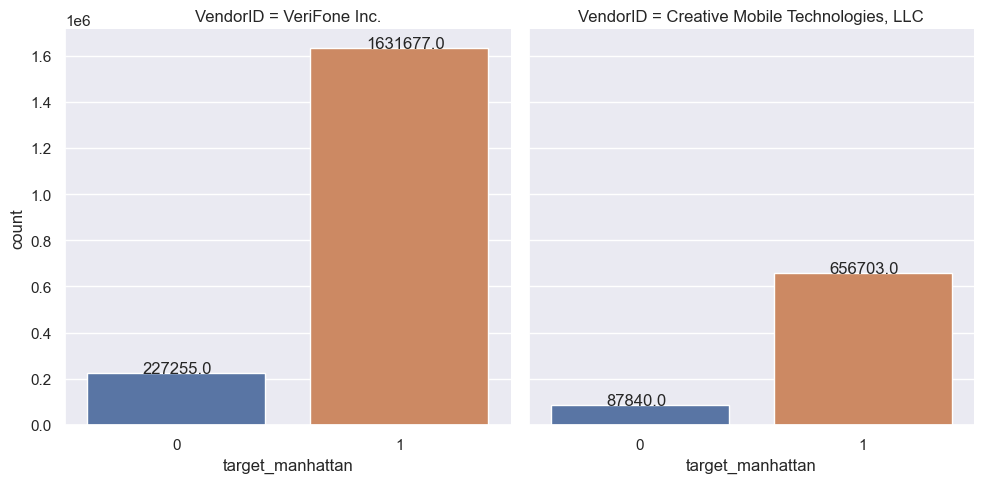

<Figure size 1000x300 with 0 Axes>

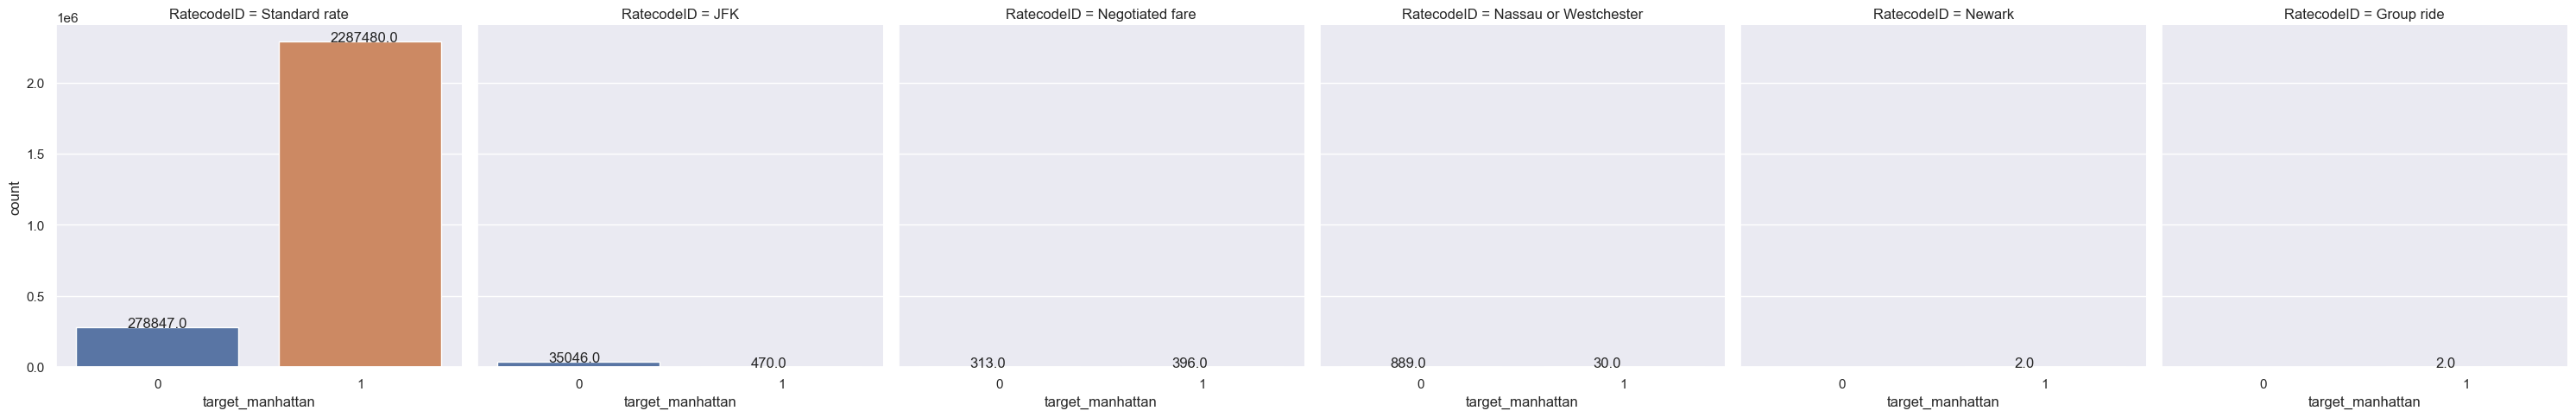

<Figure size 1000x300 with 0 Axes>

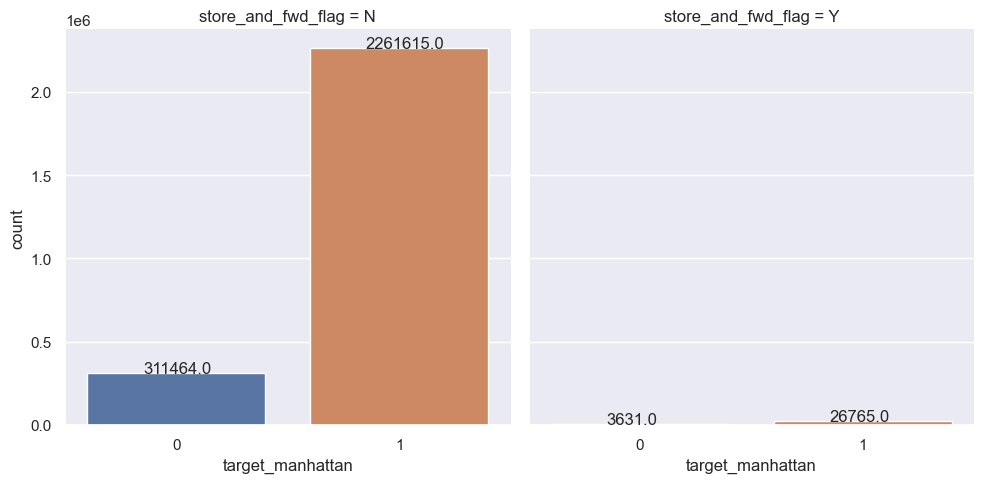

<Figure size 1000x300 with 0 Axes>

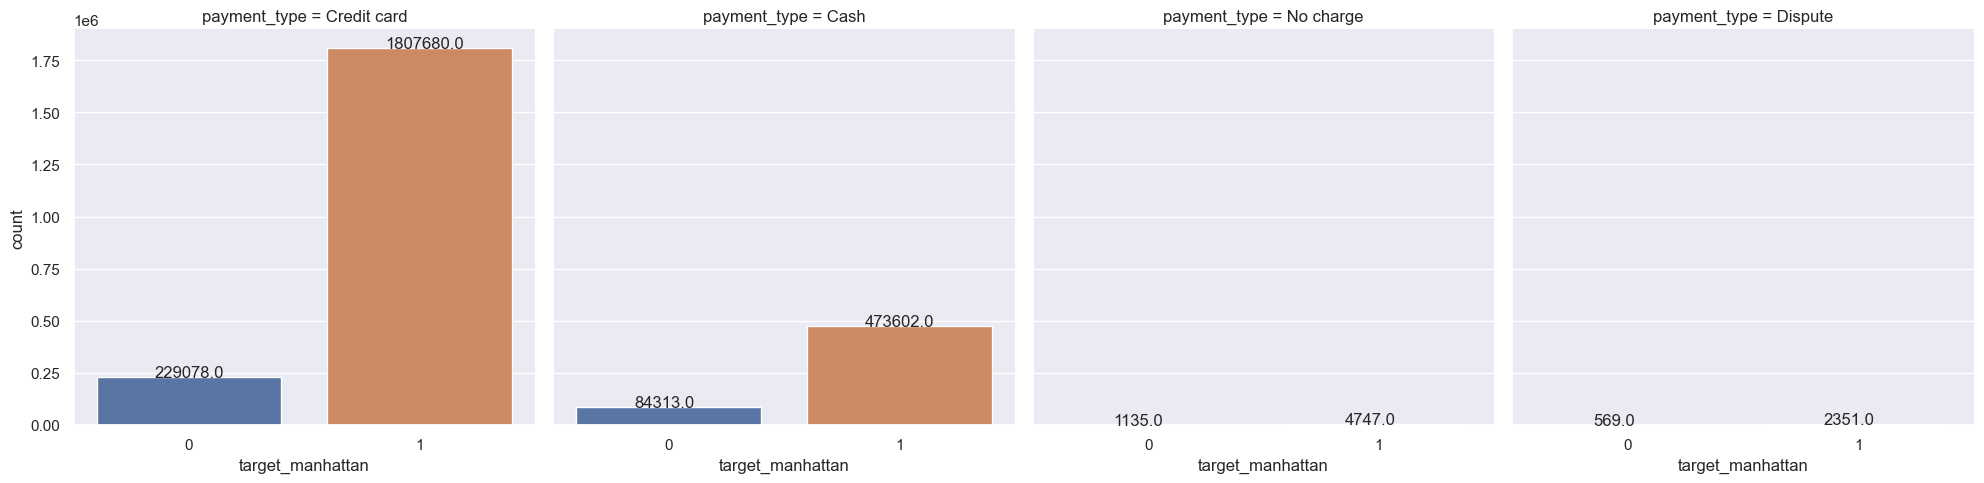

<Figure size 1000x300 with 0 Axes>

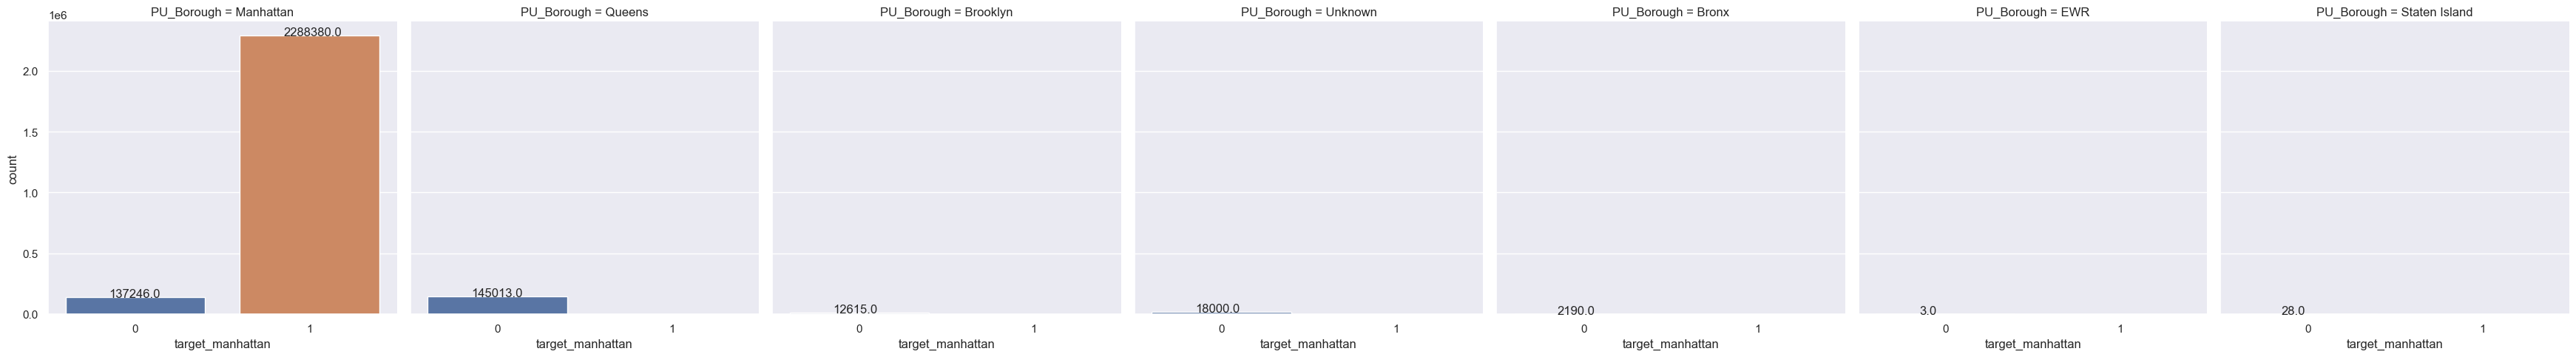

<Figure size 1000x300 with 0 Axes>

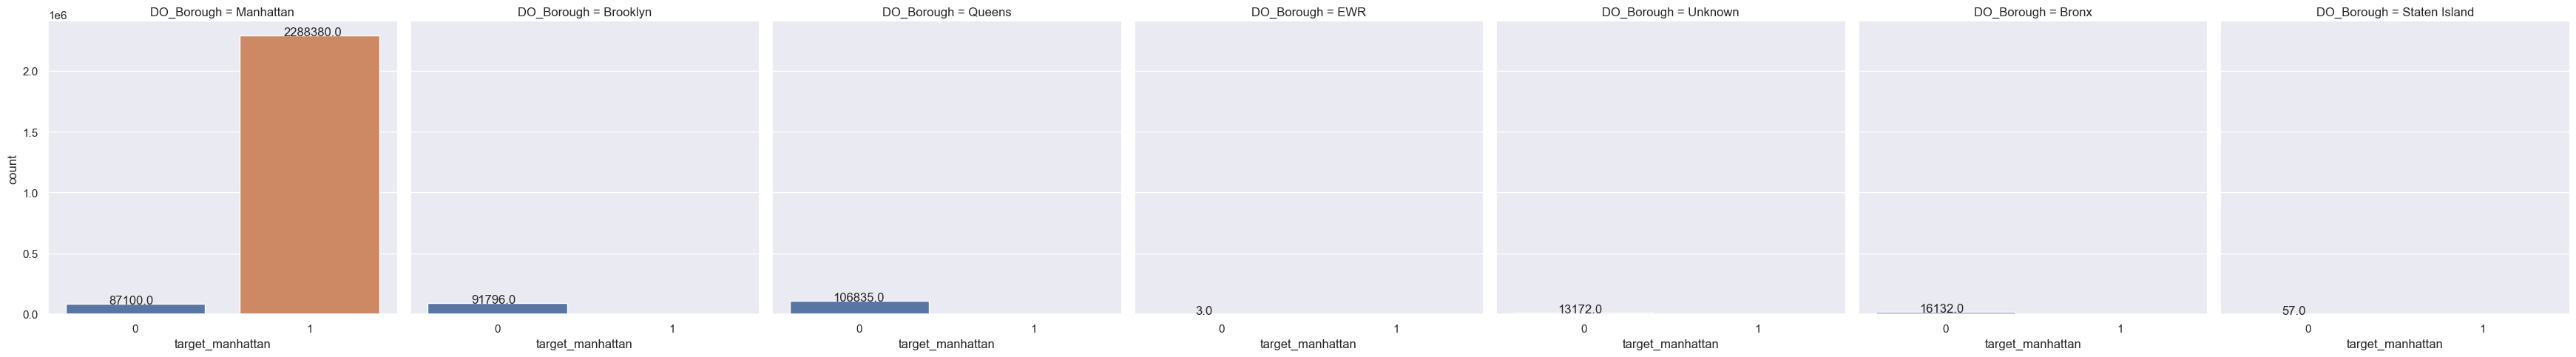

In [60]:
for col in cat_cols:
    feature_plot_with_target(col)

In [64]:
# numerical columns vs target column vizs
def dist_feat_w_target(feature):
    sns.displot(data=df, x=feature,hue='target_manhattan',kind ='kde')

C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


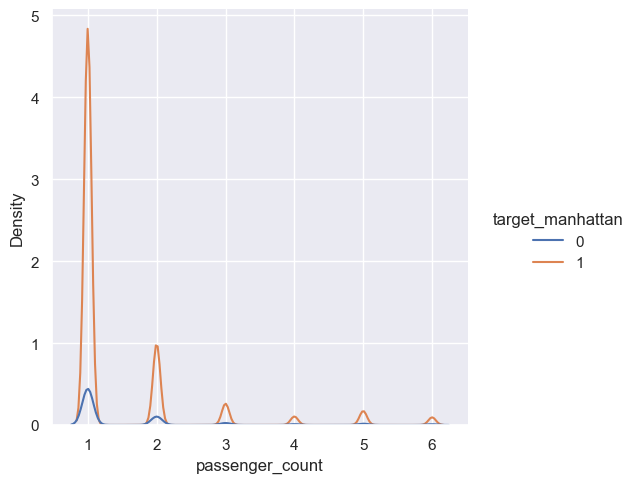

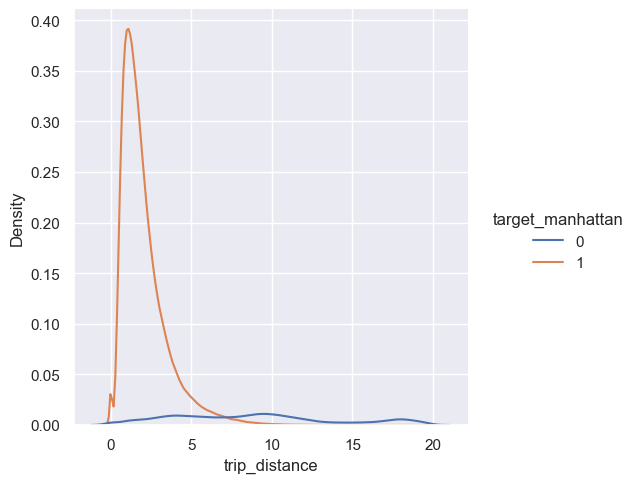

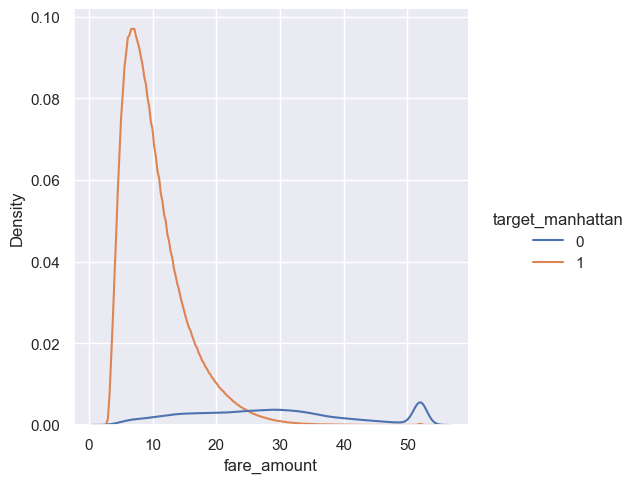

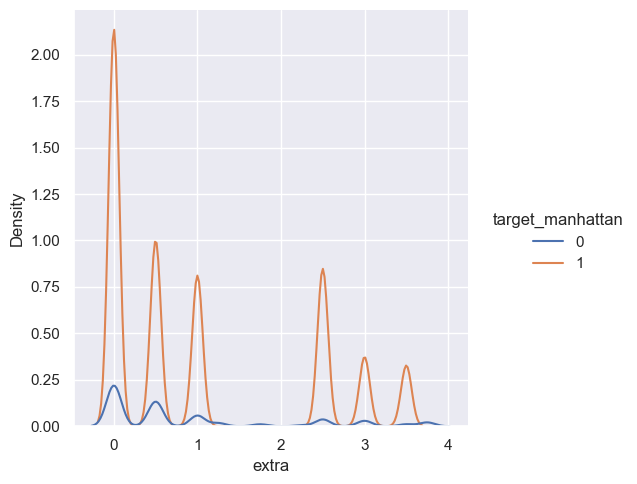

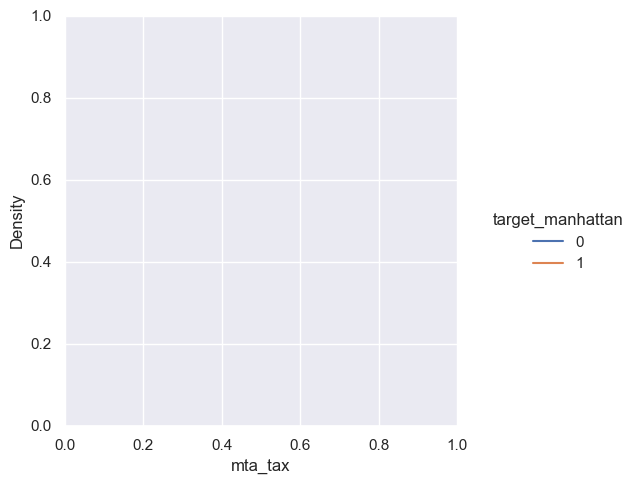

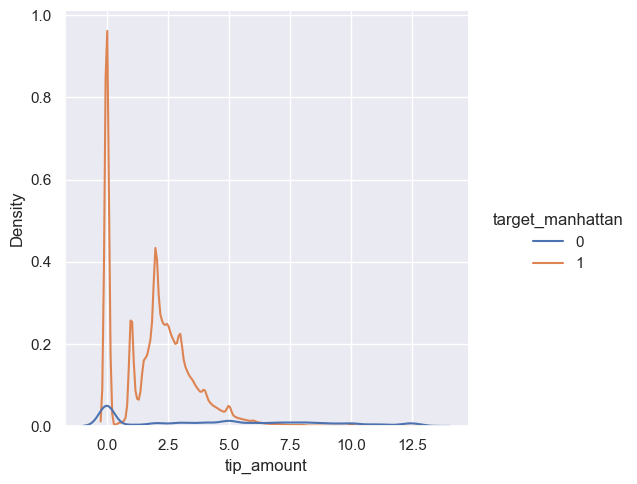

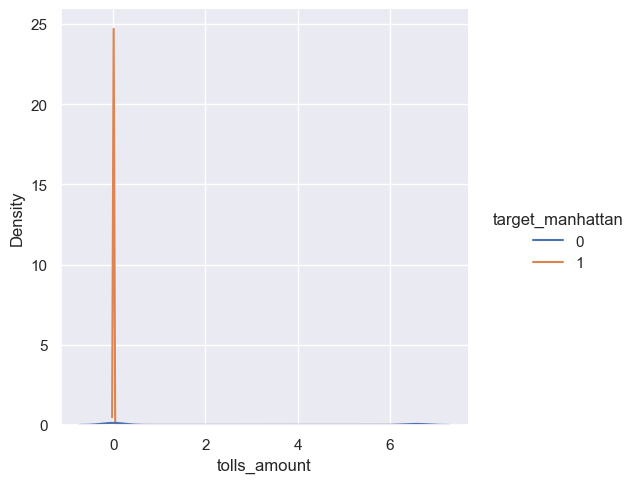

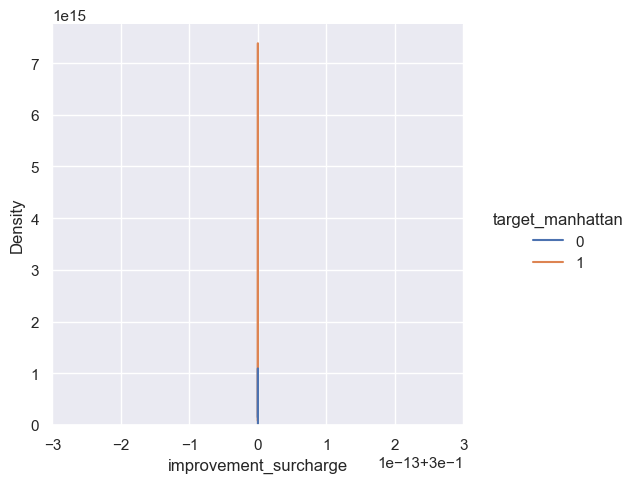

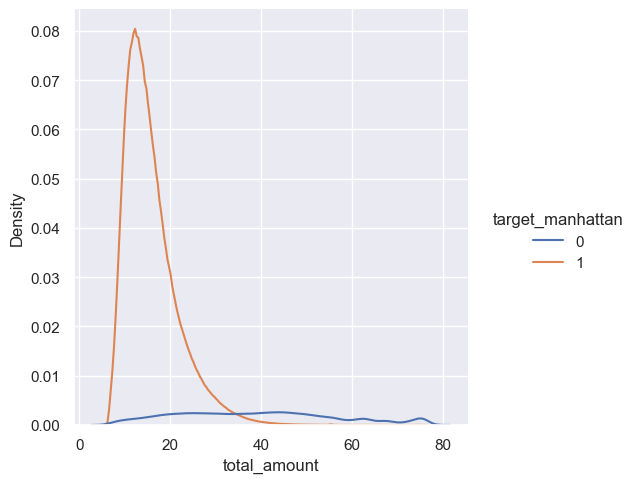

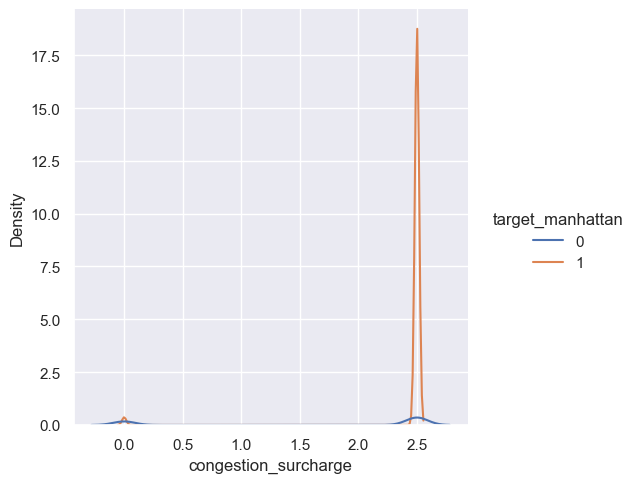

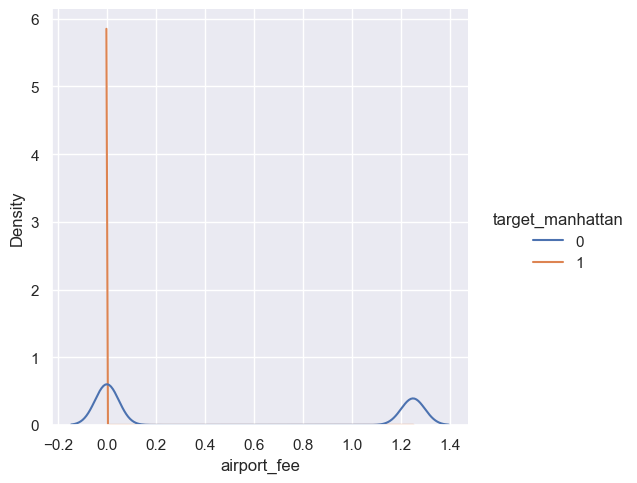

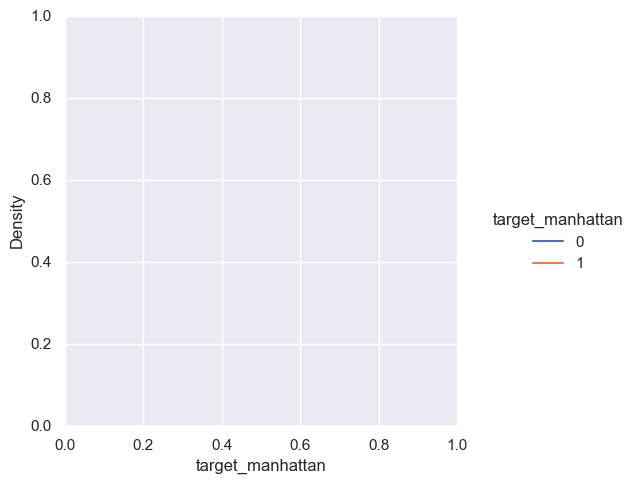

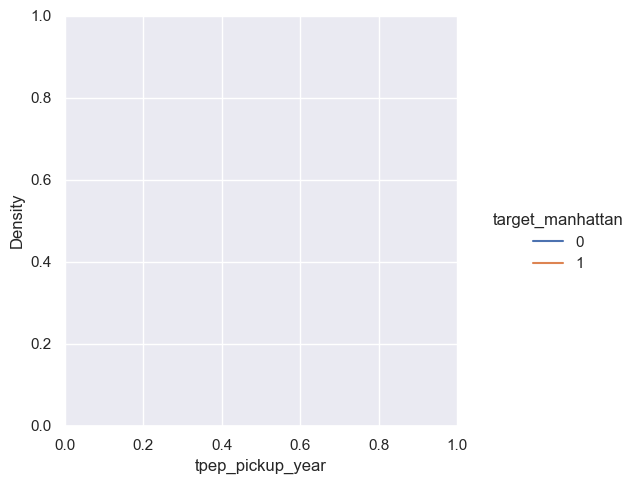

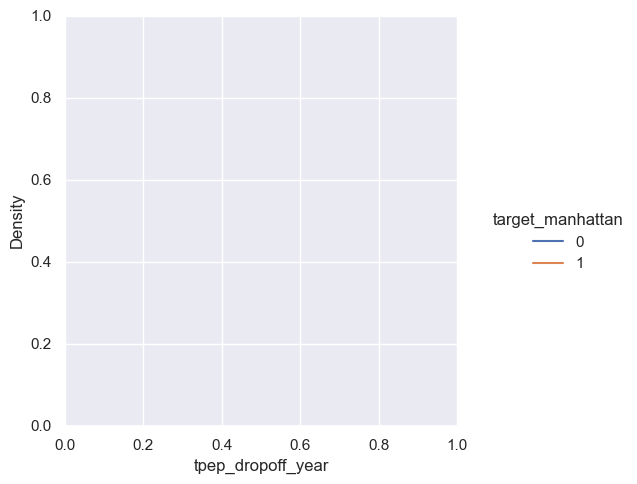

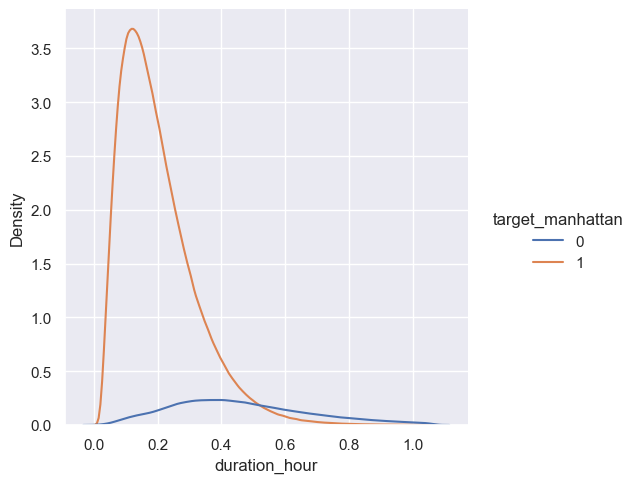

In [65]:
for col in outlier_cols:
    dist_feat_w_target(col)

C:\Users\ichfa\AppData\Local\Temp\ipykernel_8868\973181166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method="pearson")


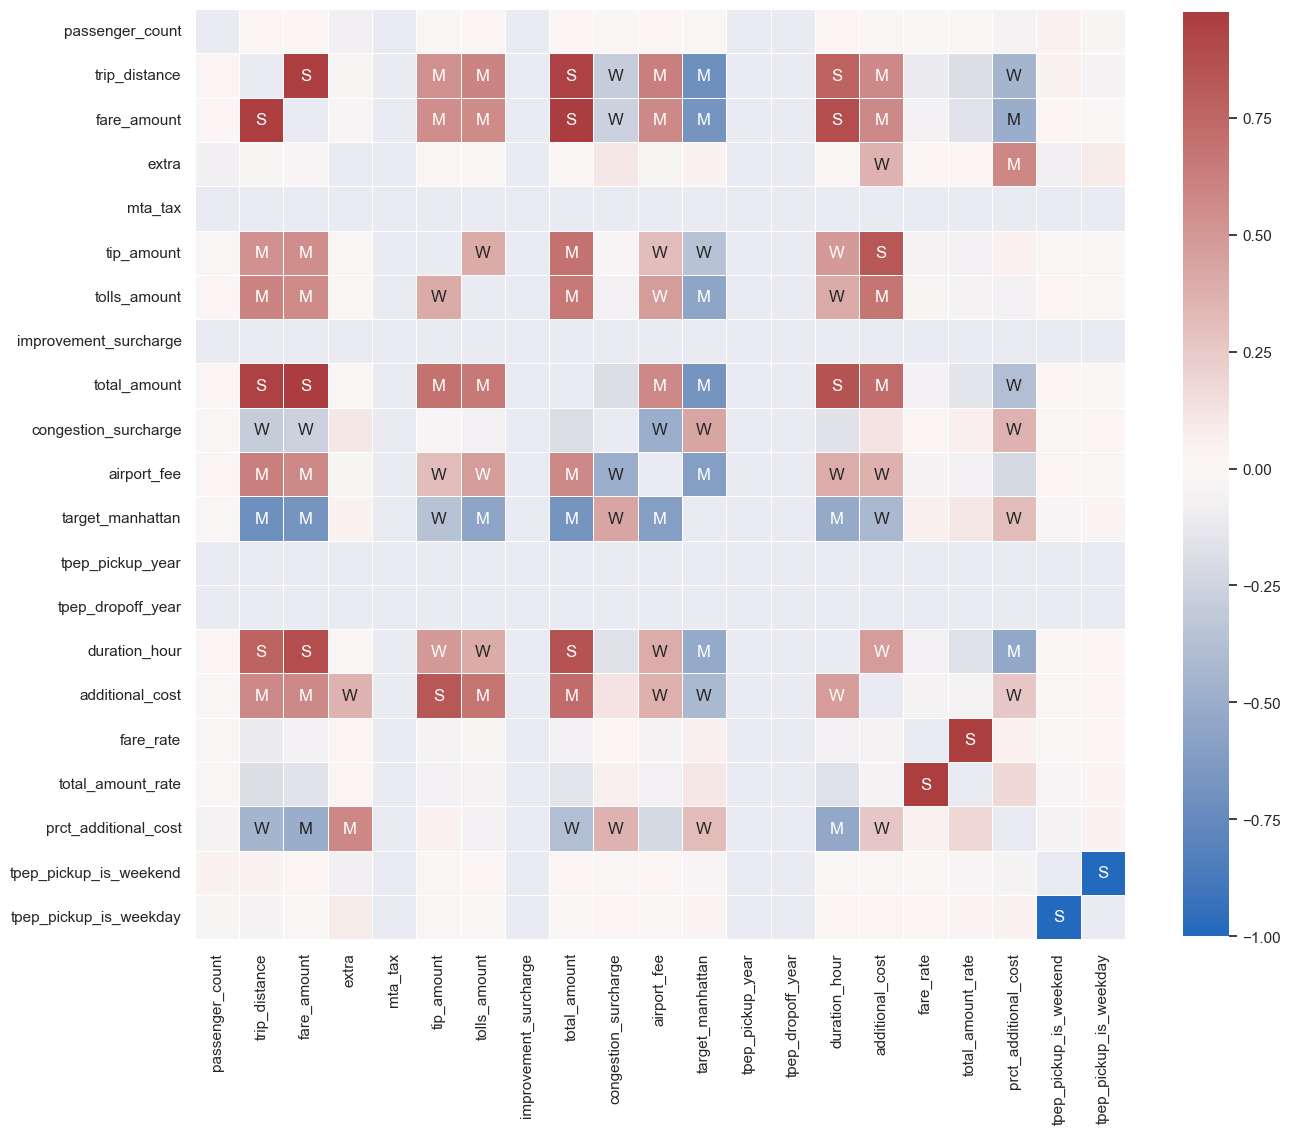

In [49]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# Note:
    ## some multicollinearity found

In [55]:
# save my cleaned_df final for later
df.to_parquet('..\dataset\\df_feat_eng_final.parquet')

### Analyze Over Time

In [4]:
df = pd.read_parquet('..\dataset\\df_feat_eng_final.parquet')

In [5]:
df['tpep_pickup_date'] = df['tpep_pickup_datetime'].apply(lambda x: x.date())
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)

**Trend in sum of total amount**

In [6]:
temp_data = df[['tpep_pickup_date', 'total_amount']].groupby('tpep_pickup_date').sum().reset_index()
temp_data.head()

,tpep_pickup_date,total_amount
0,2021-08-31,733.1700
1,2021-09-01,1329823.5300
2,2021-09-02,1457236.1200
3,2021-09-03,1497397.5100
4,2021-09-04,1417437.0400


<AxesSubplot: xlabel='tpep_pickup_date', ylabel='total_amount'>

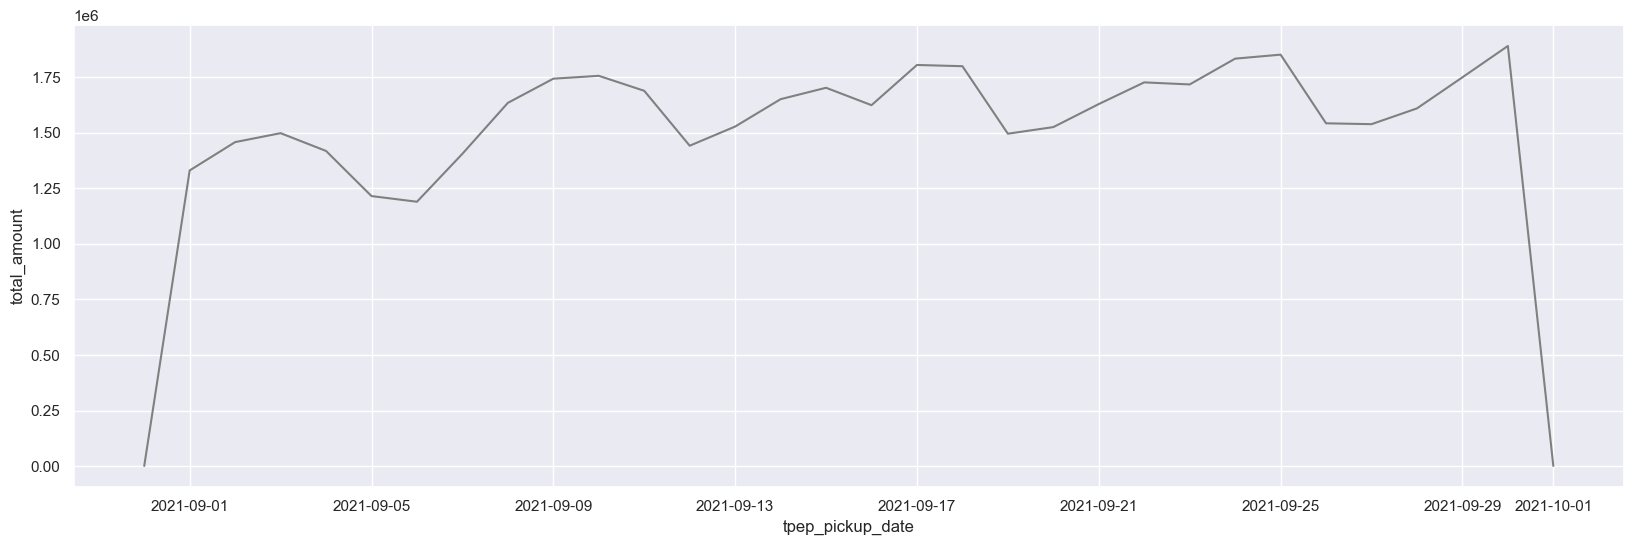

In [15]:
plt.figure(figsize=(20,6))

sns.lineplot(data=temp_data,
            x='tpep_pickup_date',
            y='total_amount',
            color='gray')

# Finding
    ## overall trend is increase in term of sum of total_amount

In [18]:
temp_cols = ['tpep_pickup_date', 'total_amount', 'target_manhattan']

temp_data_manhattan = df[temp_cols][df['target_manhattan']==1].groupby('tpep_pickup_date').sum().reset_index()
temp_data_non_manhattan = df[temp_cols][df['target_manhattan']==0].groupby('tpep_pickup_date').sum().reset_index()

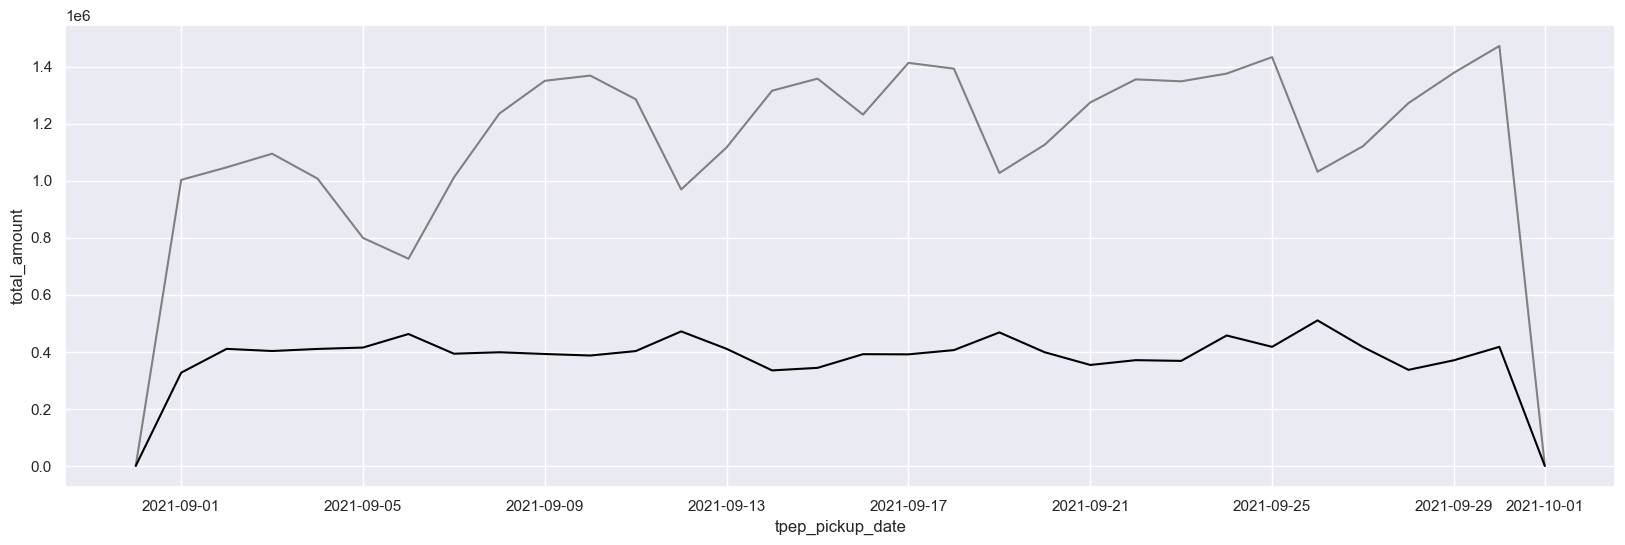

In [19]:
plt.figure(figsize=(20,6))

sns.lineplot(data=temp_data_manhattan,
            x='tpep_pickup_date',
            y='total_amount',
            color='gray')

sns.lineplot(data=temp_data_non_manhattan,
            x='tpep_pickup_date',
            y='total_amount',
            color='black')

plt.show()

# Finding
    ## the sum of total_amount in manhattan is double than non manhattan

**Trend in sum of total passenger**

In [20]:
temp_data = df[['tpep_pickup_date', 'passenger_count']].groupby('tpep_pickup_date').sum().reset_index()

<AxesSubplot: xlabel='tpep_pickup_date', ylabel='passenger_count'>

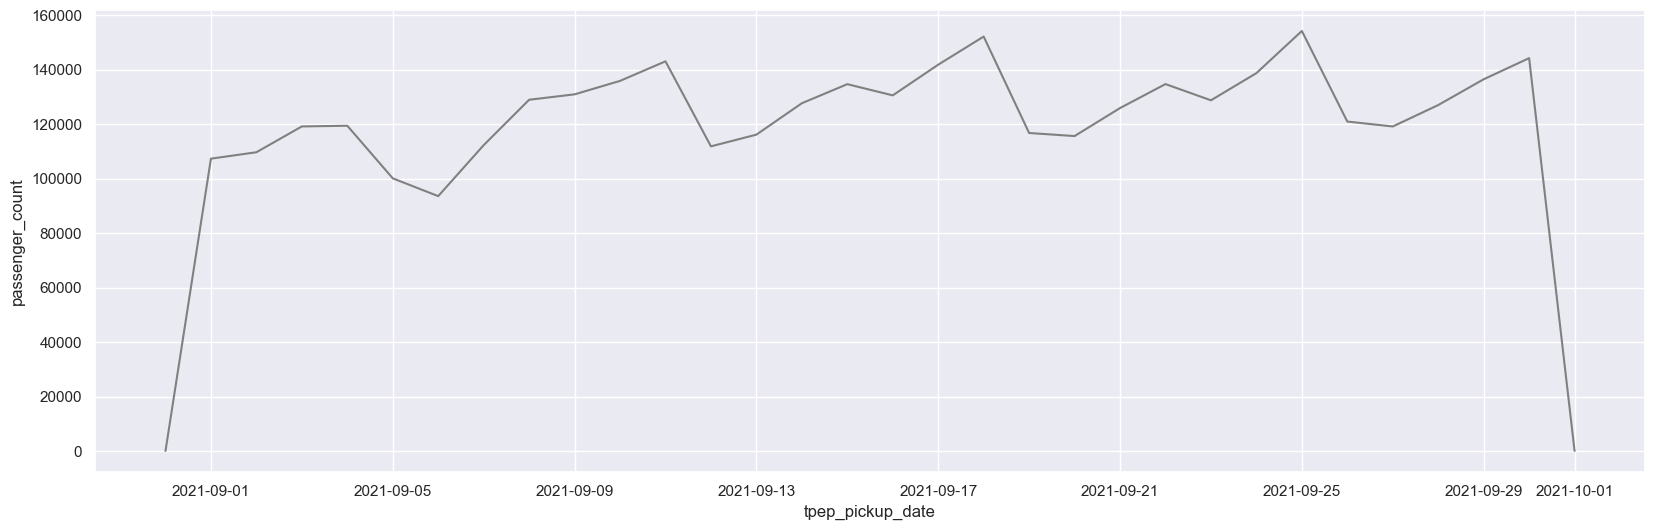

In [21]:
plt.figure(figsize=(20,6))

sns.lineplot(data=temp_data,
            x='tpep_pickup_date',
            y='passenger_count',
            color='gray')

# Finding
    ## overall trend is proportional with the sum of total_amount

In [23]:
temp_cols = ['tpep_pickup_date', 'passenger_count', 'target_manhattan']

temp_data_manhattan = df[temp_cols][df['target_manhattan']==1].groupby('tpep_pickup_date').sum().reset_index()
temp_data_non_manhattan = df[temp_cols][df['target_manhattan']==0].groupby('tpep_pickup_date').sum().reset_index()

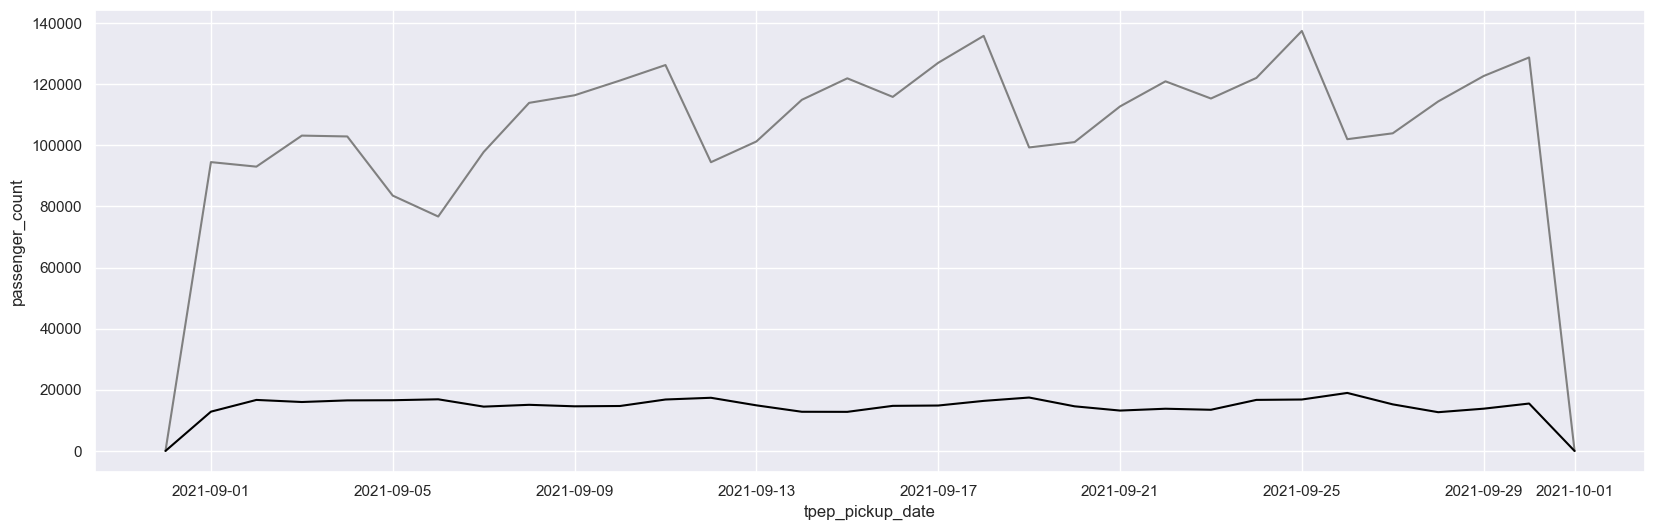

In [24]:
plt.figure(figsize=(20,6))

sns.lineplot(data=temp_data_manhattan,
            x='tpep_pickup_date',
            y='passenger_count',
            color='gray')

sns.lineplot(data=temp_data_non_manhattan,
            x='tpep_pickup_date',
            y='passenger_count',
            color='black')

plt.show()

# Finding
    ## the sum of total_amount in manhattan is 6 times than non manhattan

### Analyze Over Geographical Area

In [35]:
df['PU_Borough'].value_counts()

Manhattan        2407504
Queens            143261
Unknown            17798
Brooklyn           12002
Bronx               1876
Staten Island         26
EWR                    1
Name: PU_Borough, dtype: int64

In [36]:
temp_data = df[['PU_Borough', 'total_amount']].groupby('PU_Borough').sum().reset_index()

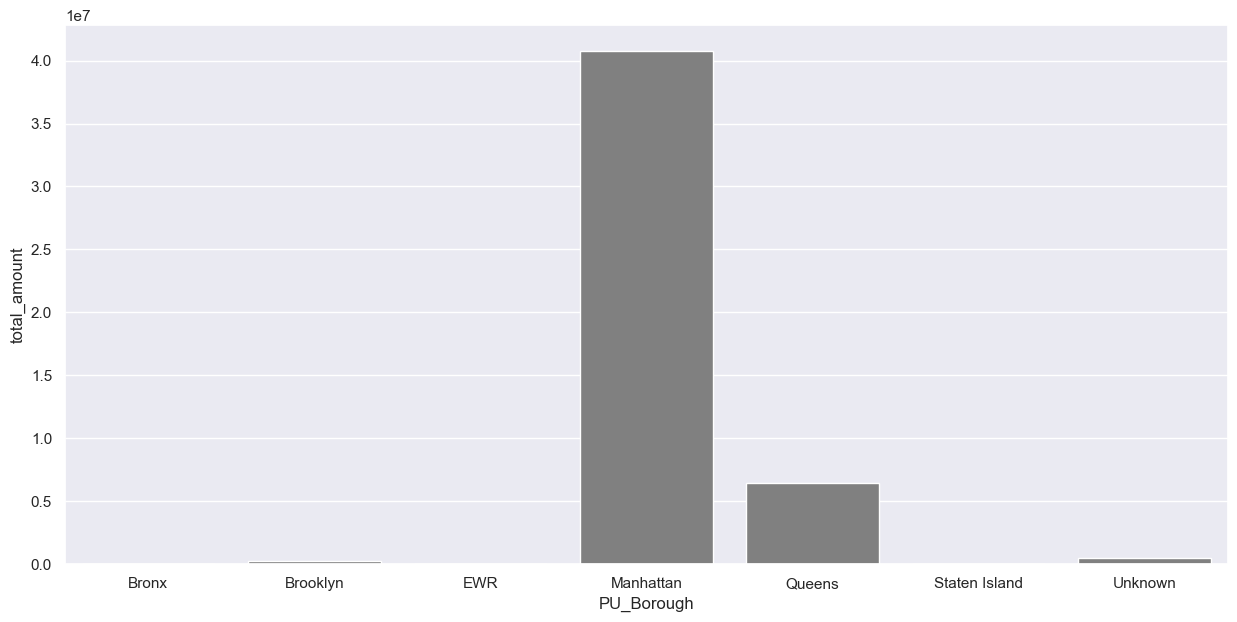

In [38]:
plt.figure(figsize=(15,7))

sns.barplot(data=temp_data,
           x='PU_Borough',
           y='total_amount',
           color='gray')
plt.show()

# Finding:
    # because of the imbalance (mostly in manhattan), the sum of total amount of manhattan is a way up than others

## <span id=2> 2. Data Preporcessing & Feature Engineering</span>  

---  


**Feature Enginnering - Notes**  

- dummy variable: 'VendorID', 'borough', 'Payment_type', 'RateCodeID', 

- derived variables:
    - `is_extra`
    - `is_tip`
    - `is_tolls`
    - `is_congestion_surcharge`
    - `is_airport_fee`
    - `tpep_pickup_datetime` : `tpep_pickup_date` `tpep_pickup_time` `tpep_pickup_hour` `tpep_pickup_day` `tpep_pickup_weekday` `tpep_pickup_is_weekend` `tpep_pickup_is_weekday` `is_working_hour`
    
    
- new variables:  
    - `duration_hour`: `tpep_dropoff_datetime` - `tpep_pickup_datetime`  
    - `speed`: `Trip_distance` / `time_elapsed`
    - `fare_rate`: `fare_amoung` / `Trip_distance`
    - `additional_cost`
    - `prct_additional_cost`
    - `average_pessanger_per_borough`
    - `median_pessanger_per_borough`
    - `average_fare_amount_per_borough`
    - `median_fare_amount_per_borough`

In [7]:
df['is_extra'] = np.vectorize(lambda x: 1 if x>0 else 0)(df['extra'])
df['is_tip'] = np.vectorize(lambda x: 1 if x>0 else 0)(df['tip_amount'])
df['is_toll'] = np.vectorize(lambda x: 1 if x>0 else 0)(df['tolls_amount'])
df['is_congestion_surcharge'] = np.vectorize(lambda x: 1 if x>0 else 0)(df['congestion_surcharge'])
df['is_airport_fee'] = np.vectorize(lambda x: 1 if x>0 else 0)(df['airport_fee'])

df['speed_per_hour'] = df['trip_distance'] / df['duration_hour']

In [8]:
df['tpep_pickup_weekday'] = df['tpep_pickup_datetime'].apply(lambda x: x.weekday())
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].apply(lambda x: x.day)
df['is_working_hour'] = df['tpep_pickup_hour'].apply(lambda x: 1 if (x>=9) and (x<18) else 0)

In [9]:
temp_cols = ['passenger_count', 'PU_Borough']

temp_df = df[temp_cols].groupby('PU_Borough').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_passenger_count', 'median_passenger_count', 'sum_passenger_count']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PU_Borough')

In [10]:
temp_cols = ['fare_amount', 'PU_Borough']

temp_df = df[temp_cols].groupby('PU_Borough').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_fare_amount', 'median_fare_amount', 'sum_fare_amount']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PU_Borough')

In [11]:
temp_cols = ['total_amount', 'PU_Borough']

temp_df = df[temp_cols].groupby('PU_Borough').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_total_amount', 'median_total_amount', 'sum_total_amount']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PU_Borough')

In [12]:
temp_cols = ['additional_cost', 'PULocationID']

temp_df = df[temp_cols].groupby('PULocationID').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_additional_cost_loc_id', 'median_additional_cost_loc_id', 'sum_additional_cost_loc_id']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PULocationID')

In [13]:
temp_cols = ['passenger_count', 'PULocationID']

temp_df = df[temp_cols].groupby('PULocationID').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_passenger_count_loc_id', 'median_passenger_count_loc_id', 'sum_passenger_count_loc_id']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PULocationID')

In [14]:
temp_cols = ['fare_amount', 'PULocationID']

temp_df = df[temp_cols].groupby('PULocationID').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_fare_amount_loc_id', 'median_fare_amount_loc_id', 'sum_fare_amount_loc_id']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PULocationID')

In [15]:
temp_cols = ['total_amount', 'PULocationID']

temp_df = df[temp_cols].groupby('PULocationID').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_total_amount_loc_id', 'median_total_amount_loc_id', 'sum_total_amount_loc_id']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PULocationID')

In [16]:
temp_cols = ['additional_cost', 'PULocationID']

temp_df = df[temp_cols].groupby('PULocationID').agg(['mean', 'median', 'sum'])
temp_df.columns = ['mean_additional_cost_loc_id', 'median_additional_cost_loc_id', 'sum_additional_cost_loc_id']
temp_df.reset_index(inplace=True)

df = pd.merge(df, temp_df, how='left', on='PULocationID')

In [80]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,DO_Borough,target_manhattan,tpep_pickup_year,tpep_dropoff_year,duration_hour,additional_cost,fare_rate,total_amount_rate,prct_additional_cost,tpep_pickup_day_name,tpep_pickup_is_weekend,tpep_pickup_is_weekday,tpep_pickup_date,tpep_pickup_hour,is_extra,is_tip,is_toll,is_congestion_surcharge,is_airport_fee,tpep_pickup_weekday,tpep_pickup_day,is_working_hour,speed_per_hour,mean_passenger_count,median_passenger_count,sum_passenger_count,mean_fare_amount,median_fare_amount,sum_fare_amount,mean_total_amount,median_total_amount,sum_total_amount,mean_additional_cost,median_additional_cost,sum_additional_cost,mean_additional_cost_loc_id_x,median_additional_cost_loc_id_x,sum_additional_cost_loc_id_x,mean_passenger_count_loc_id,median_passenger_count_loc_id,sum_passenger_count_loc_id,mean_fare_amount_loc_id,median_fare_amount_loc_id,sum_fare_amount_loc_id,mean_total_amount_loc_id,median_total_amount_loc_id,sum_total_amount_loc_id,mean_additional_cost_loc_id_y,median_additional_cost_loc_id_y,sum_additional_cost_loc_id_y
0,VeriFone Inc.,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0000,4.9000,Standard rate,N,87,229,Credit card,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.1817,5.3000,3.2653,4.4490,24.3119,Wednesday,0,1,2021-09-01,6,1,1,0,1,0,2,1,0,26.9725,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200
1,VeriFone Inc.,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0000,5.6200,Standard rate,N,87,229,Credit card,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.2481,7.0600,3.2028,4.5480,27.6213,Wednesday,0,1,2021-09-01,7,0,1,0,1,0,2,1,0,22.6562,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200
2,VeriFone Inc.,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0000,5.9800,Standard rate,N,87,229,Credit card,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,Manhattan,Manhattan,1,2021,2021,0.2772,4.8000,3.1773,4.0635,19.7531,Wednesday,0,1,2021-09-01,8,0,1,0,1,0,2,1,0,21.5711,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200


In [17]:
drop_cols = ['tpep_pickup_datetime',
'tpep_dropoff_datetime',
'PULocationID',
'DOLocationID',
'PU_Borough',
'DO_Borough',
'tpep_pickup_year',
'tpep_dropoff_year',
'tpep_pickup_day_name',
'tpep_pickup_date']

df.drop(labels=drop_cols, axis=1, inplace=True) # drop unnecessary columns

In [18]:
# get dummy of categorical columns

df_cat = df.select_dtypes(exclude='number') 
df_num = df.select_dtypes(include='number') 

df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
df_dummy = pd.concat([df_num, df_cat_dummy], axis=1)

In [85]:
df_dummy.head(3)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,target_manhattan,duration_hour,additional_cost,fare_rate,total_amount_rate,prct_additional_cost,tpep_pickup_is_weekend,tpep_pickup_is_weekday,tpep_pickup_hour,is_extra,is_tip,is_toll,is_congestion_surcharge,is_airport_fee,tpep_pickup_weekday,tpep_pickup_day,is_working_hour,speed_per_hour,mean_passenger_count,median_passenger_count,sum_passenger_count,mean_fare_amount,median_fare_amount,sum_fare_amount,mean_total_amount,median_total_amount,sum_total_amount,mean_additional_cost,median_additional_cost,sum_additional_cost,mean_additional_cost_loc_id_x,median_additional_cost_loc_id_x,sum_additional_cost_loc_id_x,mean_passenger_count_loc_id,median_passenger_count_loc_id,sum_passenger_count_loc_id,mean_fare_amount_loc_id,median_fare_amount_loc_id,sum_fare_amount_loc_id,mean_total_amount_loc_id,median_total_amount_loc_id,sum_total_amount_loc_id,mean_additional_cost_loc_id_y,median_additional_cost_loc_id_y,sum_additional_cost_loc_id_y,VendorID_VeriFone Inc.,RatecodeID_JFK,RatecodeID_Nassau or Westchester,RatecodeID_Negotiated fare,RatecodeID_Newark,RatecodeID_Standard rate,store_and_fwd_flag_Y,payment_type_Credit card,payment_type_Dispute,payment_type_No charge
0,2.0000,4.9000,16.0000,0.5000,0.5000,2.0000,0.0000,0.3000,21.8000,2.5000,0.0000,1,0.1817,5.3000,3.2653,4.4490,24.3119,0,1,6,1,1,0,1,0,2,1,0,26.9725,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200,1,0,0,0,0,1,0,1,0,0
1,1.0000,5.6200,18.0000,0.0000,0.5000,4.2600,0.0000,0.3000,25.5600,2.5000,0.0000,1,0.2481,7.0600,3.2028,4.5480,27.6213,0,1,7,0,1,0,1,0,2,1,0,22.6562,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200,1,0,0,0,0,1,0,1,0,0
2,1.0000,5.9800,19.0000,0.0000,0.5000,2.0000,0.0000,0.3000,24.3000,2.5000,0.0000,1,0.2772,4.8000,3.1773,4.0635,19.7531,0,1,8,0,1,0,1,0,2,1,0,21.5711,1.4615,1.0000,3518455.0000,11.1074,9.5000,26740993.3300,16.9407,14.8000,40784776.1000,6.0382,5.7600,14536976.4200,6.8679,6.6600,104048.8200,1.4907,1.0000,22584.0000,15.6632,15.0000,237296.9300,22.3011,21.0000,337861.6000,6.8679,6.6600,104048.8200,1,0,0,0,0,1,0,1,0,0


In [19]:
df_dummy.to_parquet('..\dataset\\df_dummy.parquet')

In [8]:
df_dummy = pd.read_parquet('..\dataset\\df_dummy.parquet')

In [20]:
X = df_dummy.drop(labels=['target_manhattan'], axis=1)
y = df_dummy['target_manhattan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1, stratify=y)

In [21]:
# scale the data

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [92]:
scaled_X_train.shape

(1936851, 65)

In [93]:
scaled_X_test.shape

(645617, 65)

In [28]:
pickle.dump(scaled_X_train, open('..\dataset\\scaled_X_train.pkl', 'wb'))
pickle.dump(scaled_X_test, open('..\dataset\\scaled_X_test.pkl', 'wb'))
pickle.dump(y_train, open('..\dataset\\y_train.pkl', 'wb'))
pickle.dump(y_test, open('..\dataset\\y_test.pkl', 'wb'))

## <span id=3> 3. Feature Selection & Modeling</span>  

In [3]:
scaled_X_train = pickle.load(open('..\dataset\\scaled_X_train.pkl', 'rb'))
scaled_X_test = pickle.load(open('..\dataset\\scaled_X_test.pkl', 'rb'))
y_train = pickle.load(open('..\dataset\\y_train.pkl', 'rb'))
y_test = pickle.load(open('..\dataset\\y_test.pkl', 'rb'))

In [4]:
smote = SMOTE(n_jobs=-1, 
              random_state=1, 
              sampling_strategy='minority')

In [5]:
resample_X_train, resample_y_train = smote.fit_resample(scaled_X_train, y_train)

**Logistic Regression Model**

In [6]:
log_reg_params = {'C': [0.01, 1, 100]}
log_reg = LogisticRegression(penalty='l1',
                             solver='saga',
                             n_jobs=-1, 
                             verbose=10, 
                             random_state=1)

rs = RandomizedSearchCV(log_reg,
                       log_reg_params,
                       verbose=10,
                       n_jobs=-1,
                       random_state=1)

In [7]:
rs.fit(resample_X_train, resample_y_train)

C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 410 seconds


C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.8min finished


RandomizedSearchCV(estimator=LogisticRegression(n_jobs=-1, penalty='l1',
                                                random_state=1, solver='saga',
                                                verbose=10),
                   n_jobs=-1, param_distributions={'C': [0.01, 1, 100]},
                   random_state=1, verbose=10)

In [9]:
joblib.dump(rs, 'rs_model.joblib')

['rs_model.joblib']

In [10]:
rs.best_estimator_

LogisticRegression(C=1, n_jobs=-1, penalty='l1', random_state=1, solver='saga',
                   verbose=10)

In [11]:
rs.classes_

array([0, 1])

In [15]:
log_reg_final = LogisticRegression(C=1, 
                                   penalty='l1',
                                 solver='saga',
                                 n_jobs=-1, 
                                 verbose=10, 
                                 random_state=1)

log_reg_final.fit(resample_X_train, resample_y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


max_iter reached after 414 seconds


C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.9min finished


LogisticRegression(C=1, n_jobs=-1, penalty='l1', random_state=1, solver='saga',
                   verbose=10)

In [30]:
joblib.dump(log_reg_final, 'log_reg_final.joblib')

['log_reg_final.joblib']

In [28]:
summary = pd.DataFrame(columns=['features', 'coefficient'])
summary['features'] = df_dummy.drop(labels='target_manhattan', axis=1).columns
summary['coefficient'] = log_reg_final.coef_[0]
summary.sort_values('coefficient', ascending=False, inplace=True)

In [34]:
summary[summary['features'] == 'additional_cost']

,features,coefficient
12,additional_cost,-0.2806


In [33]:
summary.head(20)

,features,coefficient
15,prct_additional_cost,0.7025
33,sum_fare_amount,0.6203
36,sum_total_amount,0.6151
30,sum_passenger_count,0.5949
27,is_working_hour,0.3750
22,is_congestion_surcharge,0.1815
9,congestion_surcharge,0.1815
14,total_amount_rate,0.1763
42,sum_passenger_count_loc_id,0.1435
20,is_tip,0.1356


In [32]:
summary.tail(20)

,features,coefficient
16,tpep_pickup_is_weekend,-0.0599
46,mean_total_amount_loc_id,-0.0655
5,tip_amount,-0.2102
23,is_airport_fee,-0.2422
10,airport_fee,-0.2422
12,additional_cost,-0.2806
19,is_extra,-0.2899
2,fare_amount,-0.3226
24,speed_per_hour,-0.3240
8,total_amount,-0.3337


**Random Forest Model**

In [7]:
forest_params = {'max_depth': [6,8], 
                 'min_samples_leaf': [4,10]}
forest = RandomForestClassifier(n_jobs=-1, 
                             verbose=10, 
                             random_state=1)

rs_forest = RandomizedSearchCV(forest,
                       forest_params,
                        cv=5,
                       verbose=10,
                       n_jobs=-1,
                       random_state=1)

In [8]:
rs_forest.fit(resample_X_train, resample_y_train)

C:\Users\ichfa\anaconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.2s


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.5s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   31.5s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.8s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   58.7s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100


[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.5min


building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.7min


building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  2.0min remaining:   16.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1,
                                                    verbose=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 8],
                                        'min_samples_leaf': [4, 10]},
                   random_state=1, verbose=10)

In [9]:
rs_forest.best_params_

{'min_samples_leaf': 4, 'max_depth': 8}

In [10]:
rs_forest.best_score_

0.9326194991229924

In [11]:
rs_forest.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_jobs=-1,
                       random_state=1, verbose=10)

In [6]:
forest_final = RandomForestClassifier(n_jobs=-1, 
                                      max_depth=8, 
                                      min_samples_leaf=4, 
                                      random_state=1)

forest_final.fit(resample_X_train, resample_y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, n_jobs=-1,
                       random_state=1)

In [9]:
summary = pd.DataFrame(columns=['features', 'feat_importance'])
summary['features'] = df_dummy.drop(labels='target_manhattan', axis=1).columns
summary['feat_importance'] = forest_final.feature_importances_
summary.sort_values('feat_importance', ascending=False, inplace=True)

In [12]:
summary.head(20)

,features,feat_importance
2,fare_amount,0.1371
1,trip_distance,0.1113
8,total_amount,0.1057
14,total_amount_rate,0.0737
13,fare_rate,0.0601
35,median_total_amount,0.0512
33,sum_fare_amount,0.0429
30,sum_passenger_count,0.0408
32,median_fare_amount,0.0372
31,mean_fare_amount,0.0321


In [ ]:
joblib.dump(rs_forest, 'rs_forest.joblib')
joblib.dump(forest_final, open('model_forest_final.joblib', 'wb'))